# Lending Club Case Study

## Importing Required Libraries

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

## Understanding the data

In [2]:
#Load Data
loan = pd.read_csv('loan.csv')

#Get the Number of Rows and Columns
print(loan.shape)

(39717, 111)


C:\Users\trita\AppData\Local\Temp\ipykernel_12060\1746026338.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


In [3]:
#Since there are large nuber of rows and columns, set Max rows to 100 and columns to 111
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

In [4]:
#Get the first 5 records to see the data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loan.info(verbose=True, show_counts=True)  # To see basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Observation: 
- There are lot of columns with null values and among them there are a lot having no values at all.

In [6]:
loan.describe(include=[object]).T  # see the basic statistics for data type 'object'

,count,unique,top,freq
term,39717,2,36 months,29096
int_rate,39717,371,10.99%,956
grade,39717,7,B,12020
sub_grade,39717,35,B3,2917
emp_title,37258,28820,US Army,134
emp_length,38642,11,10+ years,8879
home_ownership,39717,5,RENT,18899
verification_status,39717,3,Not Verified,16921
issue_d,39717,55,Dec-11,2260
loan_status,39717,3,Fully Paid,32950


 Observation: 
- We need to convert some columns from object type to numeric for better analysis
- There are columns which are having only single value
- we have url field which is fully unique so it will not contribute towards signigicant analysis

In [7]:
loan.describe(include=np.number).T  # to see basic statistics for numeric data

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


 Observation:
- Lot of numeric columns have null values
- Some have values with same min and max values, meaning they are singular value columns

## Data Cleanup

### Removing unrequired columns

In [8]:
# Checking for duplicate records in the data set using id
loan.id.nunique()

39717

In [9]:
# Checking for duplicate records in the data set using member id
loan.member_id.nunique()

39717

Observation:
- ID and Member ID has unique values for each record which matches the number of recors. So thre are no duplicate rows to be removed.

In [10]:
# Rmoving id and member_id as they are unique identifiers and not relevant for analysis
# Removing url (not relevant), title (data not consistent) and desc as they are not relevant for analysis
# Removing single valued columns not relevant for analysis - pymnt_plan, earliest_cr_line, initial_list_status, 
# collections_12_mths_ex_med, policy_code, mths_since_last_major_derog, application_type, annual_inc_joint, acc_now_delinq,
# chargeoff_within_12_mths, delinq_amnt, tax_liens

columnsToDelete = [ 'id', 'member_id', 'url', 'emp_title', 'desc', 'pymnt_plan', 'earliest_cr_line', 'initial_list_status', 
                    'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 
                    'chargeoff_within_12_mths', 'tax_liens', 'title', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv',
                    'total_pymnt_inv', 'total_rec_late_fee', 'recoveries',
                    'collection_recovery_fee']

loan = loan.drop(columnsToDelete, axis=1)
#loan = loan.drop('title', axis=1)
loan.shape

(39717, 88)

### Null Value Treatment

#### Removing Columns with majority null values

In [11]:
#Get the number of Null/NA/NAN
loan.isnull().sum()

loan_amnt                             0
funded_amnt                           0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
purpose                               0
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq            25682
mths_since_last_record            36931
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                           50


In [12]:
loan.isna().any().sum()       # finding count of columns with no values

62

In [13]:
loan.isna().all().sum()       # finding count of all columns with no values

54

Observation:
- We see that 62 columns have null values where 54 have no values at all

In [14]:
#Remove the columns will all/majority of null values

loan.dropna(how='all', axis=1, inplace=True)
loan.shape

(39717, 34)

In [15]:
#Get the percentage of Null/NA/NAN
(loan.isna().sum()/loan.shape[0])*100

loan_amnt                  0.000000
funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
total_pymnt                0.000000
total_rec_prncp            0

Observation:
- there are 3 columns which have more than 60% null values in them

In [16]:
# droppoing columns with above or equal to 60% null values
high_null = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [17]:
loan.drop(high_null, axis=1, inplace=True)   # droping the above columns
loan.shape

(39717, 31)

In [18]:
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d              71
last_pymnt_amnt            0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

#### Filling Null Values

In [19]:
# columns who still have null values
remaining_null_cols= ['emp_length', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']

In [20]:
# looking at columns data type to understand how to impute their missing values
loan[remaining_null_cols].dtypes

emp_length               object
revol_util               object
last_pymnt_d             object
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [21]:
# adding loan status to the above columns so I can perform a group by to see how thier value changes by the status
grp_cols = remaining_null_cols + ['loan_status']
grp_cols

['emp_length',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'loan_status']

In [22]:
loan[grp_cols].groupby(by=['loan_status']).agg(pd.Series.mode)

,emp_length,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
loan_status,,,,,
Charged Off,10+ years,0%,Oct-12,May-16,0.0
Current,10+ years,0%,May-16,May-16,0.0
Fully Paid,10+ years,0%,Mar-13,May-16,0.0


In [23]:
# filling in with mode values
loan.emp_length.fillna('10+ years', inplace=True)
loan.revol_util.fillna('0%', inplace=True)
loan.last_pymnt_d.fillna(loan.last_pymnt_d.mode()[0], inplace=True)
loan.last_credit_pull_d.fillna(loan.last_credit_pull_d.mode()[0], inplace=True)
loan.pub_rec_bankruptcies.fillna(0, inplace=True)

In [24]:
loan.isna().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d            0
last_pymnt_amnt         0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

### Filtering Data

Since the records having loan status as 'Current' are still paying the loans they can not be considered for analysis of loan default, these records can be dropped.

In [25]:
loan = loan[(loan['loan_status'] != 'Current')].copy()
loan.shape
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### Formatting Data correctly

In [26]:
#Remove months from term and convert it to int

loan.term = loan.term.str.rstrip('months').astype(int)
loan.term.value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [27]:
#Remove < Year, +Years from emp_length and convert to int

loan.emp_length = loan.emp_length.str.rstrip('years')
loan.emp_length = loan.emp_length.str.replace('< 1','0')
loan.emp_length = loan.emp_length.str.replace('10+','10')
loan.emp_length = loan.emp_length.astype(float)
loan.emp_length.value_counts()

emp_length
10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [28]:
#Remove XXX from last 3 digits of zipcode and convert it to int
loan.zip_code = loan.zip_code.str.rstrip('x').astype('int64')
loan.zip_code.dtypes

dtype('int64')

In [29]:
#Standardize dti to all floats rounded to 2 decimals
loan.dti = round(loan['dti'].astype(float), 2)
loan.dti.dtypes

dtype('float64')

In [30]:
#Remove % from int_rate and covert it to float
loan.int_rate = loan.int_rate.str.rstrip('%').astype('float')
loan.int_rate.value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [31]:
#Convert home_ownership to string and replace None with Others as ownership cannot be None
loan.home_ownership = loan.home_ownership.str.replace('NONE', 'OTHER')
loan.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [32]:
#Convert issue_d to datetime and derive Year and Month of issue
loan.issue_d = pd.to_datetime(loan.issue_d, dayfirst = False, yearfirst = False, format="%b-%y")

In [33]:
loan.revol_util = loan.revol_util.str.rstrip("%")
loan.revol_util = round(loan['revol_util'].astype(float), 2)
loan.revol_util.dtypes

dtype('float64')

In [34]:
#total_pymnt - Standardize to all floats rounded to 2 decimals
loan.total_pymnt = round(loan.total_pymnt.astype(float), 2)
loan.total_pymnt.dtypes

dtype('float64')

In [35]:
#last_credit_pull_d - convert to date/time
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, dayfirst = False, yearfirst = False, format="%b-%y")

### Identifying outliers

In [36]:
def boxPlot():
    plt.figure(figsize = (10, 15))

    plt.subplot(3,2,1)
    sns.boxplot(loan.loan_amnt)
    plt.xticks((0,),('loan_amt',))

    plt.subplot(3,2,2)
    sns.boxplot(loan.int_rate)
    plt.xticks((0,),('Interest Rate',))

    plt.subplot(3,2,3)
    sns.boxplot(loan.installment)
    plt.xticks((0,),('Installment',))

    plt.subplot(3,2,4)
    sns.boxplot(loan.annual_inc)
    plt.xticks((0,),('Annual Income',))

    plt.subplot(3,2,5)
    sns.boxplot(loan.funded_amnt)
    plt.xticks((0,),('Funded Amount',))

    plt.subplot(3,2,6)
    sns.boxplot(loan.revol_bal)
    plt.xticks((0,),('Revol Bal',))
    plt.show()

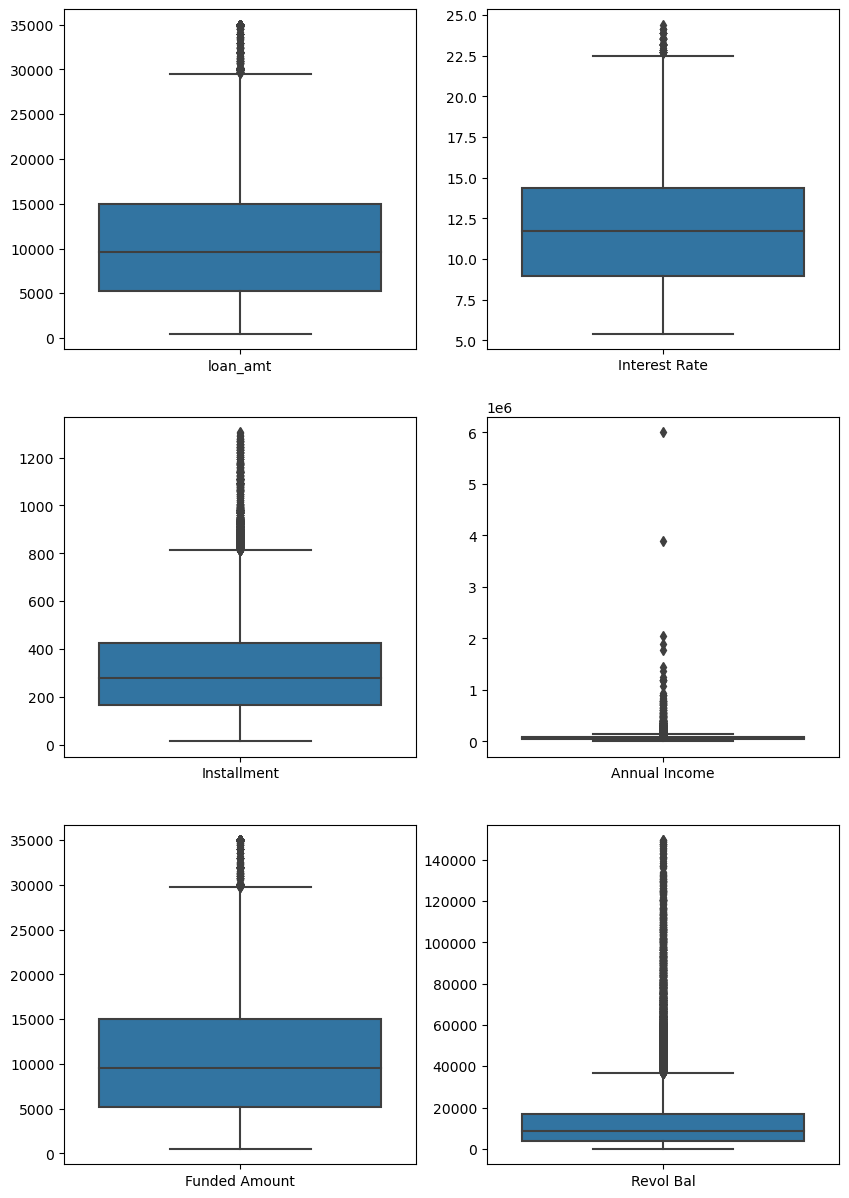

In [37]:
boxPlot()

Observation:
- The plots clearly show outliers. Treating outliers by calculating IQR or taking the 95th percentile
- Outlier treatment for Annual income and Revol Bal is necessary
- There is not much impact of other outliers as they are not extreme values which would mpact the analysis

In [38]:
q3 = loan.annual_inc.quantile(.75)
q1 = loan.annual_inc.quantile(.25)
iqr = q3-q1
l_lim = q1 - (1.5*iqr)
h_lim = q3 + (1.5*iqr)

q1, q3, iqr, l_lim, h_lim

(40000.0, 82000.0, 42000.0, -23000.0, 145000.0)

In [39]:
loan[loan.annual_inc <= h_lim].shape[0] / loan.shape[0] *100

95.43251160017627

Number of records using IQR upper limit is 95th percentile. So capping all the outliers to the 95th percentile

In [40]:
q3 = loan.annual_inc.quantile(0.95)
loan = loan[loan.annual_inc <= q3]

In [41]:
q3 = loan.loan_amnt.quantile(0.95)
loan = loan[loan.loan_amnt <= q3]

In [42]:
q3 = loan.int_rate.quantile(0.95)
loan = loan[loan.int_rate <= q3]

In [43]:
q3 = loan.installment.quantile(0.95)
loan = loan[loan.installment <= q3]

In [44]:
q3 = loan.funded_amnt.quantile(0.95)
loan = loan[loan.funded_amnt <= q3]

In [45]:
q3 = loan.revol_bal.quantile(0.95)
loan = loan[loan.revol_bal <= q3]

Box Plot After treating outliers look much better and are good to proceed now

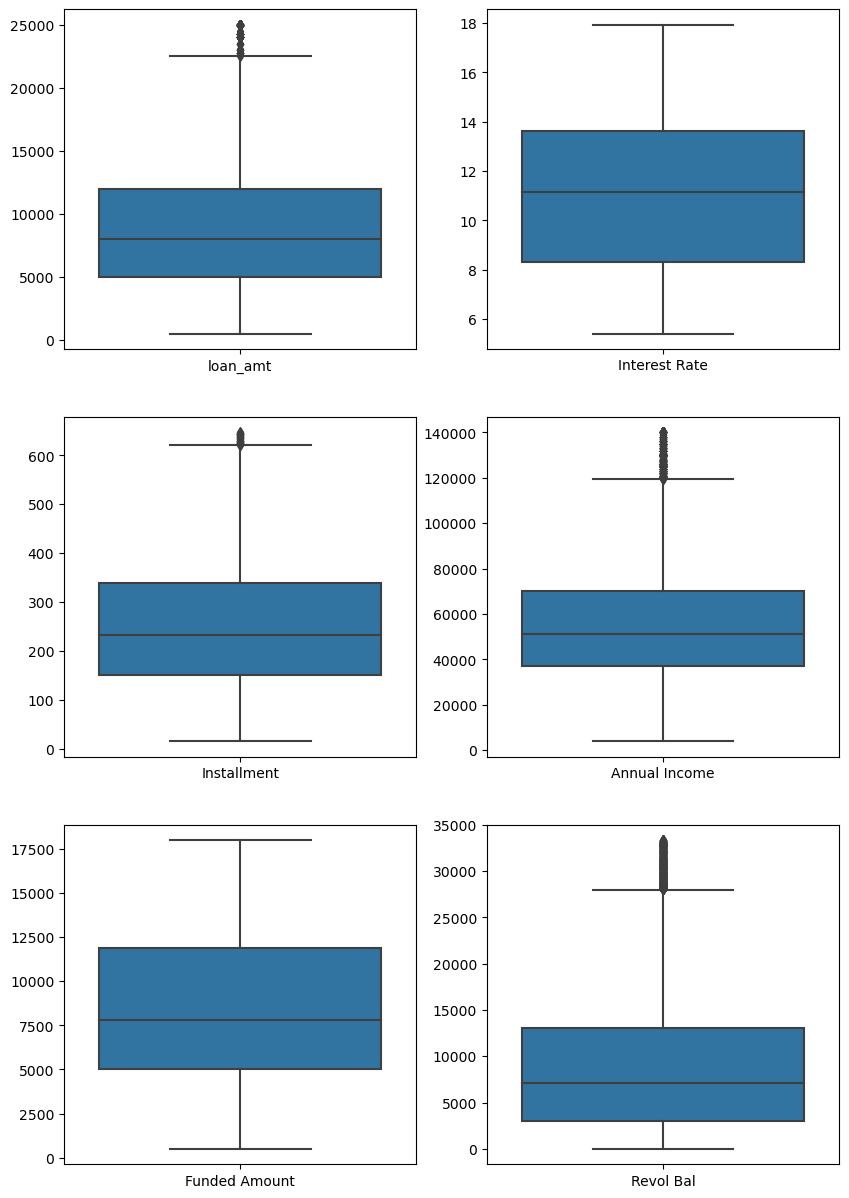

In [46]:
boxPlot()

## Deriving the necessary Metrics
- Income Slab - Derived Metrics
- Experience Group - Derived Metrics
- Interest Group - Business driven Metrics
- Issue Month = Data driven Metrics
- Issue Year - Data driven Metrics
- Funed Amount Range - Derived Metrics

In [47]:
def income(e):
    if e > 200000:
        return '200K+'
    elif e >150000:
        return '150K - 200K'
    elif e >100000:
        return '100K - 150K'
    elif e >50000:
        return '50K - 100K'
    else:
        return '0 - 50K'

In [48]:
loan['income_slab'] = loan.annual_inc.apply(income)

In [49]:
def work_exp(exp):
    if exp <= 3:
        return '0 - 3Y'
    elif exp <= 6:
        return '3 - 6Y'
    elif exp > 6:
        return '6 - 10Y+'  

In [50]:
loan['exp_group'] = loan.emp_length.apply(work_exp)

In [51]:
loan['issue_month'] = loan.issue_d.dt.month

In [52]:
loan['issue_year'] = loan.issue_d.dt.year

In [53]:
#Quantitaive metrics on interest rate to derive other metrics
loan.int_rate.describe()

count    29044.000000
mean        11.217796
std          3.211165
min          5.420000
25%          8.320000
50%         11.140000
75%         13.610000
max         17.930000
Name: int_rate, dtype: float64

In [54]:
def interest(intRate):
    if intRate < 10.0:
        return '5 - 10%'
    elif intRate <= 12.0:
        return '10 - 12%'
    elif intRate <= 14.0:
        return '12 - 14%'
    elif intRate <= 20.0:
        return '14 - 20%'
    else:
        return '20% +'

In [55]:
loan['interest_grp'] = loan.int_rate.apply(interest)

In [56]:
def fundedAmountRange (amount):
    if amount < 3000:
        return '0 - 3K'
    elif amount >= 3000 and amount < 6000:
        return '3 - 6K'
    elif amount >= 6000 and amount < 9000:
        return '6 - 9K'
    elif amount >= 9000 and amount < 12000:
        return '9 - 12K'
    elif amount >= 12000 and amount < 15000:
        return '12 - 15K'
    elif amount >= 15000 and amount < 18000:
        return '15 - 18K'
    else:
        return '18K +'

In [57]:
loan['fundedAmntRange'] = loan.funded_amnt.apply(fundedAmountRange)

In [58]:
loanChargedOff = loan[loan.loan_status == 'Charged Off']

In [59]:
#Check the information after adding new columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29044 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             29044 non-null  int64         
 1   funded_amnt           29044 non-null  int64         
 2   term                  29044 non-null  int32         
 3   int_rate              29044 non-null  float64       
 4   installment           29044 non-null  float64       
 5   grade                 29044 non-null  object        
 6   sub_grade             29044 non-null  object        
 7   emp_length            29044 non-null  float64       
 8   home_ownership        29044 non-null  object        
 9   annual_inc            29044 non-null  float64       
 10  verification_status   29044 non-null  object        
 11  issue_d               29044 non-null  datetime64[ns]
 12  loan_status           29044 non-null  object        
 13  purpose              

## Exploratory Data Analysis

### Business Driven Metrics

In [60]:
table = loan.pivot_table(index= 'loan_status', values= ['funded_amnt', 'total_pymnt', 'total_rec_prncp', 'total_rec_int'],
                aggfunc='sum')
table.style.format("{:.0f}")

,funded_amnt,total_pymnt,total_rec_int,total_rec_prncp
loan_status,,,,
Charged Off,31780300,18371628,4956017,11789058
Fully Paid,207486100,243395862,35889628,207486003


In [61]:
round(table['total_pymnt']['Charged Off'] / table['funded_amnt']['Charged Off'] * 100, 2)

57.81

In [62]:
profit = table['total_pymnt']['Fully Paid'] - table['funded_amnt']['Fully Paid']
round( profit / table['funded_amnt']['Fully Paid'] * 100, 2)

17.31

In [63]:
dataVar1 = round ( loan[loan.funded_amnt == loan.loan_amnt].shape[0] / loan.shape[0] * 100, 2 )
dataVar2 = round ( loan[loan.funded_amnt < loan.loan_amnt].shape[0] / loan.shape[0] * 100, 2 )

In [64]:
print(dataVar1, "\n", dataVar2)

96.14 
 3.86


Observation
- Only 57.49% of the funded amount is recovered for the charged off loans (including the inteest received)
- This indicates that 42.51% of the charged off loan are not yet recovered and may get converted to direct loss over a   period of time 
- We also see that fully paid loans have yielded a profit of 17.31%
- 96.14% of times Lending Club funds the entire loan amount and only 3.86% of times the funded amount is less than loan amount which could be due to ineligibility of the applicants

### Univariate Analysis

In [65]:
def uniVariateAnalysis(variable1, xTicksRotation=0, barWidth=0.4, yTickUpperLimit=0, yTickInterval=0, xLabel='', figSize=(5, 4)):
    plt.figure(figsize=figSize)
    sns.countplot(loan, x=variable1, width=barWidth)
    plt.xticks(rotation=xTicksRotation)
    plt.xlabel(xLabel)
    plt.show()

#### Loan Status Facts

In [66]:
loan.loan_status.value_counts(normalize=True)*100

loan_status
Fully Paid     86.91296
Charged Off    13.08704
Name: proportion, dtype: float64

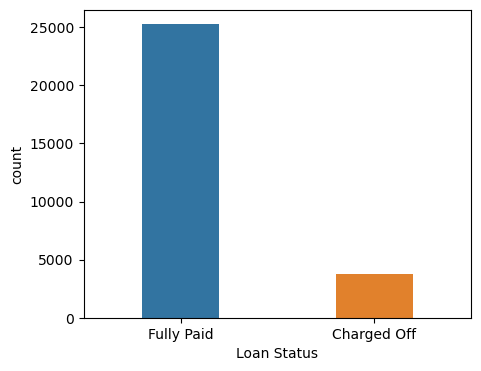

In [67]:
uniVariateAnalysis('loan_status', xLabel='Loan Status')

Observation
- After removing the outliers, we have approximately 86.9% ~ 87% of the customers who have fully paid
- 13% of the borrowers have charged off

#### Interest Group Facts

In [68]:
loan.interest_grp.value_counts(normalize=True)*100

interest_grp
5 - 10%     36.131387
10 - 12%    23.244044
14 - 20%    21.105908
12 - 14%    19.518661
Name: proportion, dtype: float64

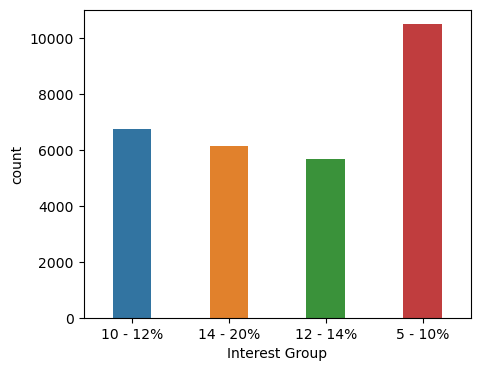

In [69]:
uniVariateAnalysis('interest_grp', xLabel='Interest Group')

Observations
- We have maximum borrowers in low interest group of 5-10%
- There are small differences in other interest groups

#### Income Slabs Facts

In [70]:
loan.annual_inc.describe()

count     29044.000000
mean      55912.067163
std       25626.159830
min        4000.000000
25%       37000.000000
50%       51000.000000
75%       70000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [71]:
loan.income_slab.value_counts(normalize=True)*100

income_slab
0 - 50K        49.053161
50K - 100K     44.663270
100K - 150K     6.283570
Name: proportion, dtype: float64

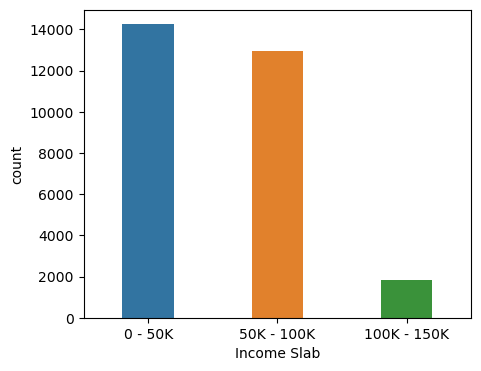

In [72]:
uniVariateAnalysis('income_slab', xLabel='Income Slab')

Observation
- We have maximum borrowers in low income group that has annual income ranging from 0 to 50K
- We have considerably high borrowers in medium incom with an annual income ranging from 50 to 100K
- We have the least number in Income Slab 3
- After treating the outliers, we do not have anyone in slabs 150K and above

#### Experience Group Facts

In [73]:
loan.exp_group.value_counts(normalize=True)*100

exp_group
0 - 3Y      44.136483
6 - 10Y+    32.943121
3 - 6Y      22.920397
Name: proportion, dtype: float64

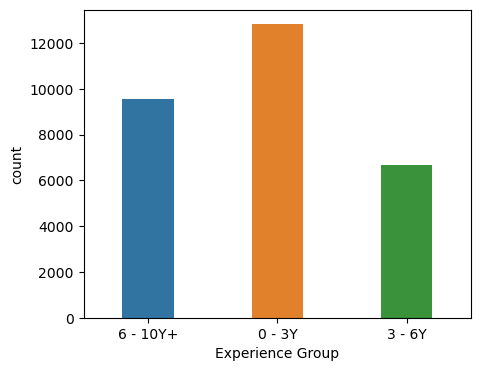

In [74]:
uniVariateAnalysis('exp_group', xLabel='Experience Group')

Observations
- We have highest borrowers from the low experience group with employment length ranging from 0 to 3 years
- We also hve considerable borrowers from the high exp group with employment length ranging from 6 years to 10+ years
- We have minimum borrowers from medium exp groups with employment length ranging from 3 to 6 years

#### Installment Facts

In [75]:
loan.installment.describe()

count    29044.000000
mean       251.551409
std        132.553088
min         15.690000
25%        150.800000
50%        233.270000
75%        339.310000
max        646.960000
Name: installment, dtype: float64

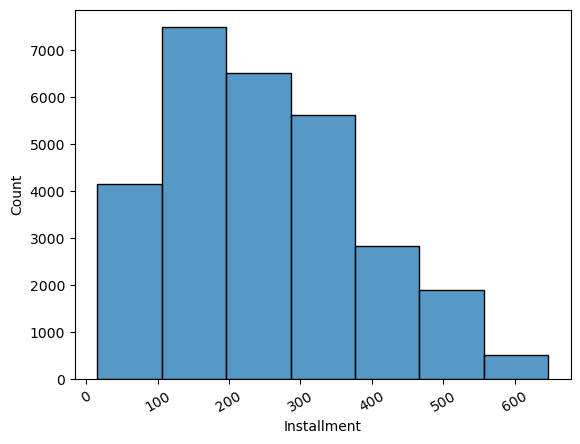

In [76]:
sns.histplot(loan, x='installment', bins=7)
plt.xticks(list( range(0, 700, 100) ), rotation=30)
plt.xlabel("Installment")
plt.show()

Observation
- Installment has a standard dev of 132.5 indicating a very large spread
- The range is vast with a mnimum of 15.6 and a maximum of 646.9 and a mean of 251.5

#### Term in Months Facts

In [77]:
loan.term.value_counts(normalize=True) * 100

term
36    82.137447
60    17.862553
Name: proportion, dtype: float64

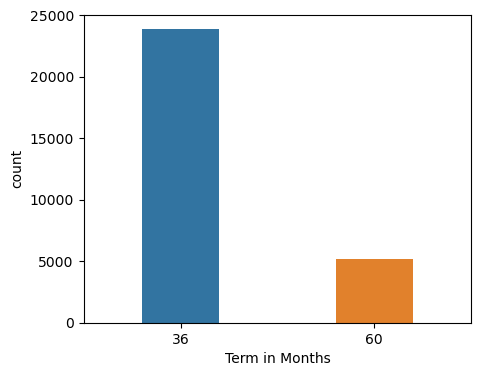

In [78]:
uniVariateAnalysis('term', xLabel='Term in Months')

Observation
- We can see that 82.1% of the borrowers take a loan for a term of 36 months whereas 17.8% prefer a term of 60 months

#### Home Ownership Facts

In [79]:
loan.home_ownership.value_counts(normalize=True) * 100

home_ownership
RENT        52.520314
MORTGAGE    39.009778
OWN          8.177248
OTHER        0.292659
Name: proportion, dtype: float64

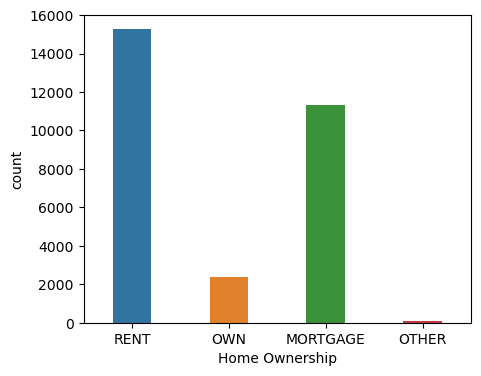

In [80]:
uniVariateAnalysis('home_ownership', xLabel='Home Ownership')

Observation
- We see that a maximum of the people(52.5%) are in Rent homes
- The share of mortgage properties (39.0%) is the second highest
- On houses contibute to 8.1%
- Others (May be lease or any other applicable agreements etc) is Negligible and is 0.2%

#### Verification Status facts

In [81]:
loan.verification_status.value_counts(normalize=True) * 100

verification_status
Not Verified       50.602534
Source Verified    26.790387
Verified           22.607079
Name: proportion, dtype: float64

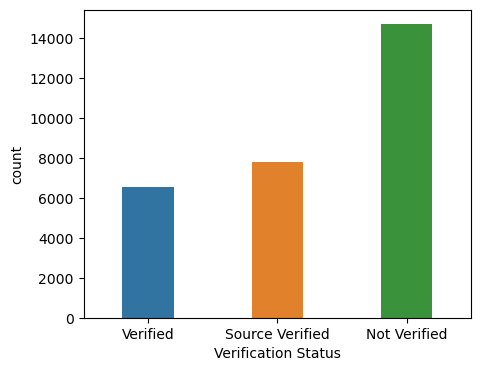

In [82]:
uniVariateAnalysis('verification_status', xLabel='Verification Status')

Observation
- We see that majority of the loans(50.6%) are Not Verified
- 22.6% are Verified
- 26.7% are Source Verified

#### Purpose Facts

In [83]:
loan.purpose.value_counts(normalize=True) * 100

purpose
debt_consolidation    44.945600
credit_card           12.925217
other                 11.000551
home_improvement       6.982509
major_purchase         6.297342
car                    4.500069
small_business         3.718496
wedding                2.613276
medical                1.941881
moving                 1.738741
vacation               1.184410
educational            0.984713
house                  0.884864
renewable_energy       0.282330
Name: proportion, dtype: float64

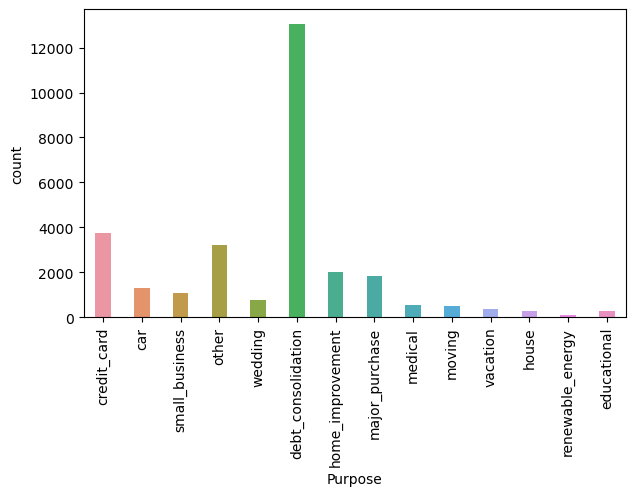

In [84]:
uniVariateAnalysis('purpose', xLabel='Purpose', yTickUpperLimit=18000, yTickInterval=1500, xTicksRotation=90, figSize=(7, 4))

Observation
- Maximum(44.9% ~ 45%) of the loans are funded for debt consolidation while a considerable lower (12.9% ~ 13%) are towards credit cards.

#### Grades facts

In [85]:
loan['my_subgrade'] = loan.sub_grade.str[-1]
#loan1 = loan
table1 = loan[['grade', 'my_subgrade']].pivot_table(index=['grade'], columns='my_subgrade',
                aggfunc=len)

table1['Sum_Grades'] = table1.sum(axis=1)
table1

my_subgrade,1,2,3,4,5,Sum_Grades
grade,,,,,,
A,1047.0,1368.0,1607.0,2461.0,2330.0,8813.0
B,1525.0,1597.0,2159.0,1899.0,2004.0,9184.0
C,1611.0,1506.0,1196.0,972.0,909.0,6194.0
D,731.0,995.0,841.0,643.0,495.0,3705.0
E,349.0,255.0,229.0,151.0,134.0,1118.0
F,16.0,10.0,NaN,3.0,1.0,30.0


C:\Users\trita\AppData\Local\Temp\ipykernel_12060\2675074235.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


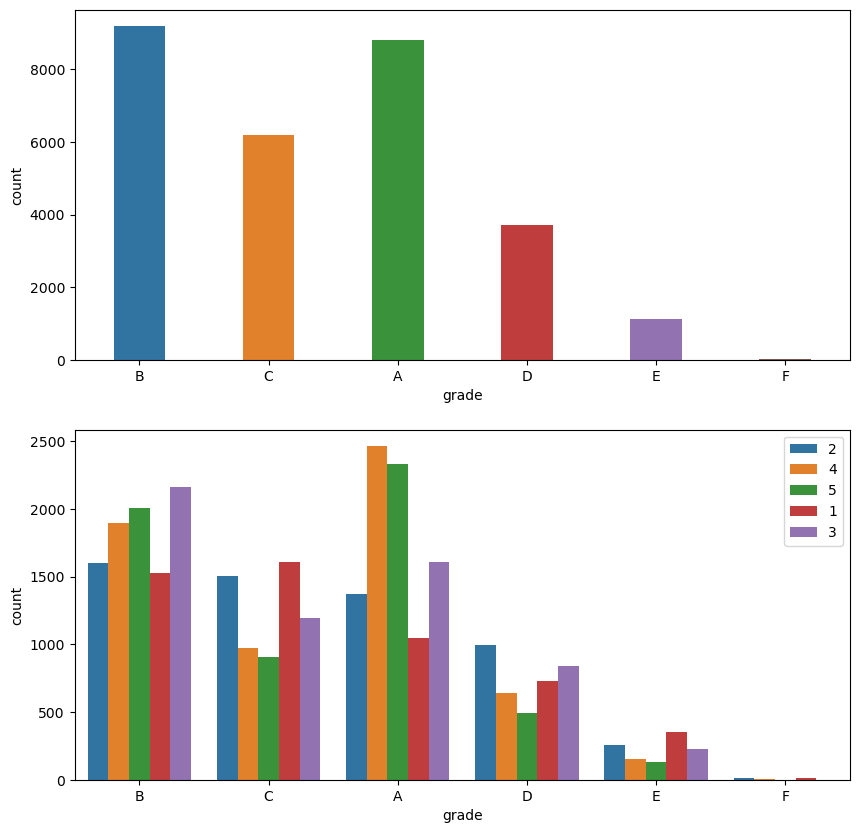

In [86]:
ax = plt.subplots(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.countplot(loan, x='grade', width=0.4)
plt.xticks(rotation=0)

plt.subplot(2, 1, 2)
sns.countplot(loan, x='grade', hue='my_subgrade')
plt.legend()
plt.xticks(rotation=0)

plt.show()

Observations
- We have the maximum number of applicants from Grade B at a grade level
- We also have considerably high number of applicants nearly equivalent to Grade B from Grade A
- The number of applicants from Grade F are negligible
- When studying the distribution in subgrades, we see that A4 has the maximum loan borrowers

#### Month wise loans Facts

In [87]:
loan.issue_month.value_counts(normalize=True) * 100

issue_month
12    10.501308
11    10.315384
10     9.341000
7      8.927834
9      8.907175
8      8.607630
6      8.380388
5      7.636689
4      7.574714
3      7.130561
2      6.352431
1      6.324886
Name: proportion, dtype: float64

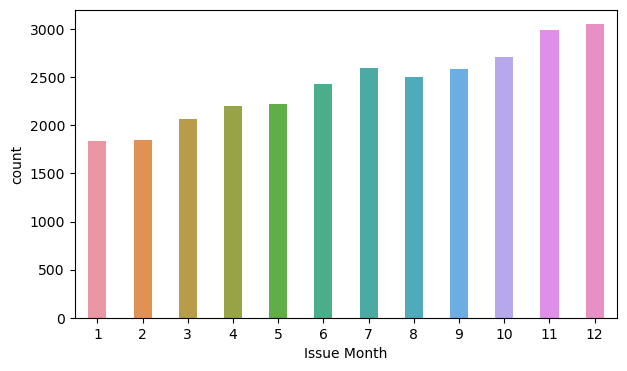

In [88]:
uniVariateAnalysis('issue_month', xLabel='Issue Month', figSize=(7, 4), xTicksRotation=0)

Observations
- We see there is an increasing trend in the loans taken monthly from Jan to Dec
- Dec month is having the maximum loans

#### Year wise loans Facts

In [89]:
loan.issue_year.value_counts(normalize=True) * 100

issue_year
2011    50.530230
2010    31.590001
2009    12.842584
2008     4.389891
2007     0.647294
Name: proportion, dtype: float64

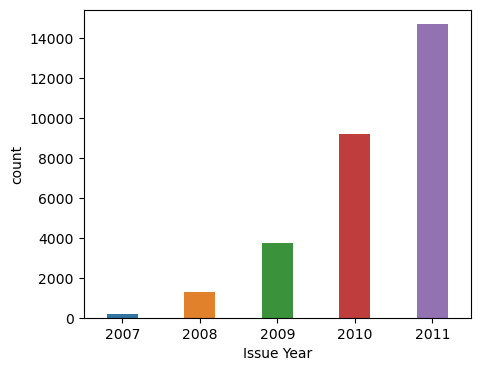

In [90]:
uniVariateAnalysis('issue_year', xLabel='Issue Year', xTicksRotation=0)

Observations
- We see there is an increasing trend in the loans taken yearly from 2007 to 2011
- 2011 was the year when maximum loans were issued (50%)
- The increase in loan is significant year on year
- 2011 was the year when Global recession ended which could be the cause of maximum loans in 2011

### Bivariate Analysis


#### Heat Map

<Axes: >

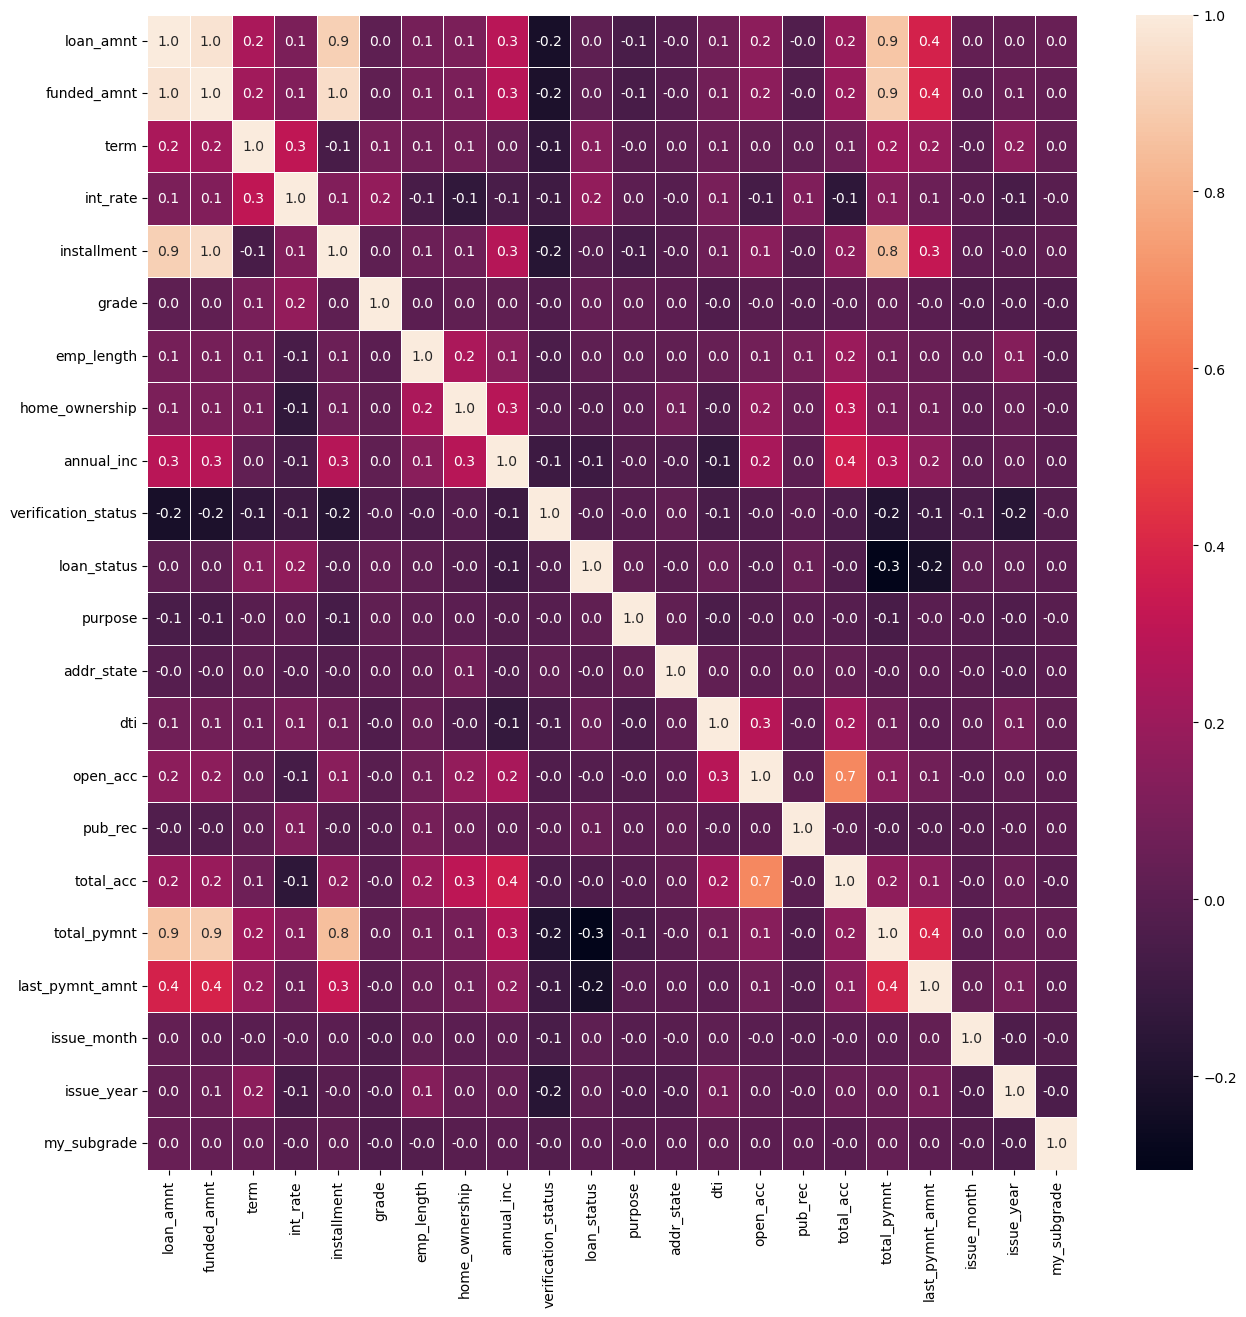

In [91]:
# To create a heatmap and identify the related variables
loan2 = loan.copy()
col = ['grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
loan2[col] = loan2[col].apply(lambda x : pd.factorize(x)[0].astype(int))
loan2.drop(['sub_grade', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'zip_code', 'total_rec_prncp', 
            'total_rec_int', 'inq_last_6mths', 'delinq_2yrs', 'revol_bal', 'revol_util', 'pub_rec_bankruptcies',
            'income_slab', 'exp_group', 'interest_grp', 'fundedAmntRange'],
           axis=1, inplace=True)
plt.figure(figsize=(15, 15))
sns.heatmap(loan2.corr(), annot=True, fmt='.1f', linewidth=0.5)

Observations
- Loan amount and funded amount are highly co-related
- Open accounts and total accounts are also highly co-related
- Total payment has high co-relation with loan amount, funded amount and installment
- Loan status doesn't seem to be impacted with most variables in the heatmap which is very strange

#### Analysis using Pair Plot

C:\Users\trita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


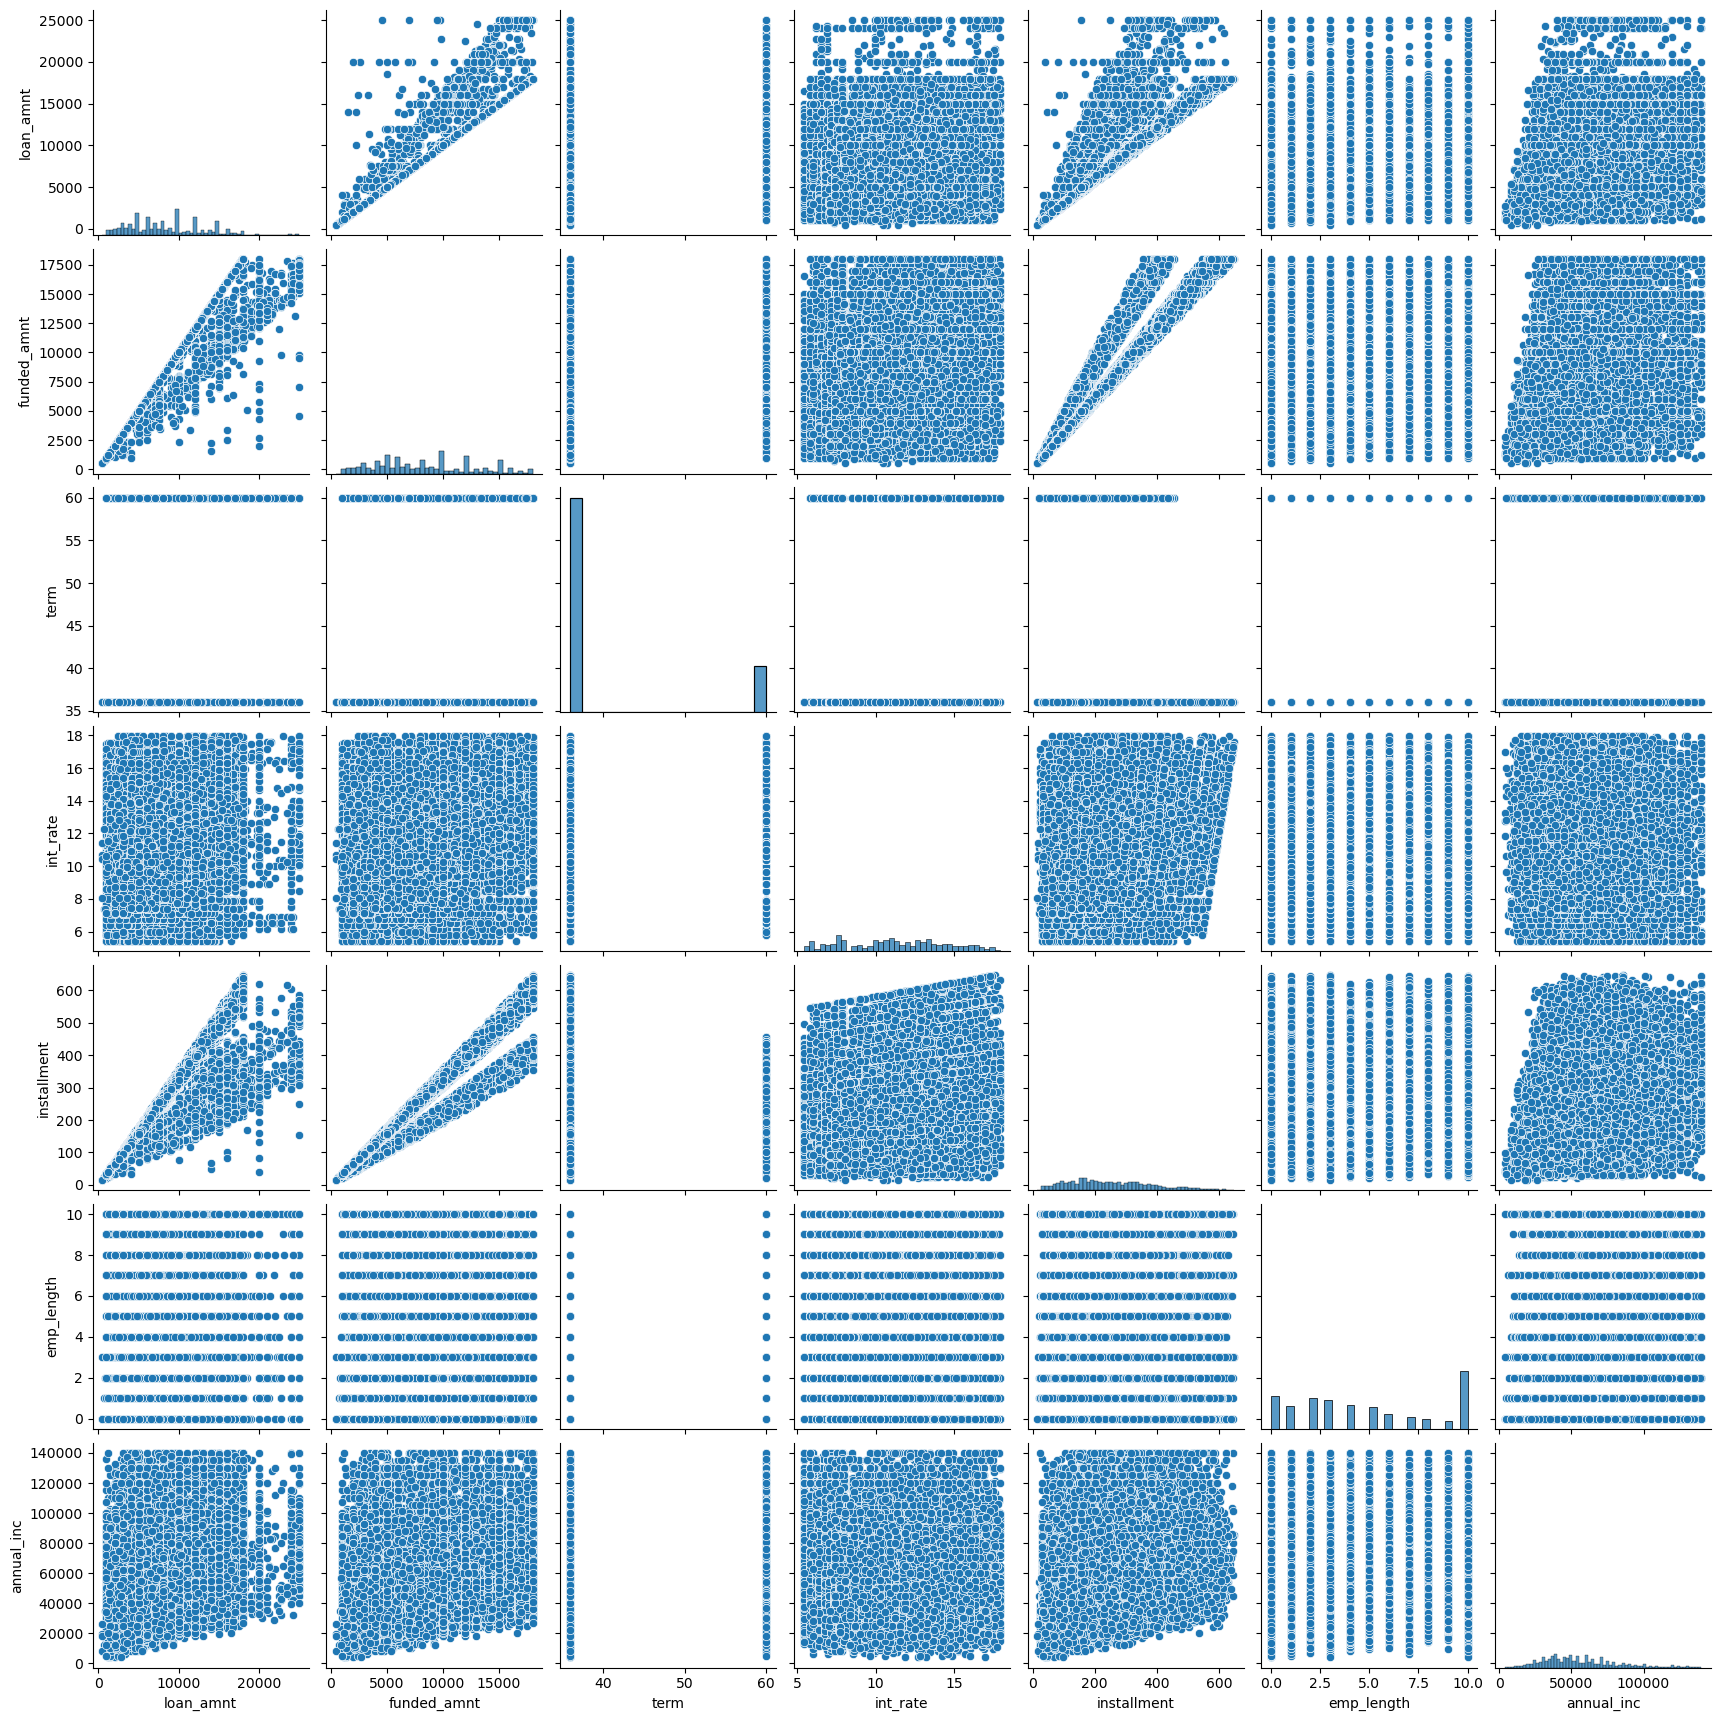

In [92]:
loanSubset = loan[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',  'emp_length', 'home_ownership', 
                   'annual_inc', 'verification_status', 'loan_status', 'purpose']]
sns.pairplot(data=loanSubset)
#addr_state', 'dti', 'open_acc',
                   #'total_acc', 'total_pymnt', 'issue_month', 'issue_year', 'my_subgrade', 'grade',

##### Loan Amount versus Funded amount

In [93]:
loan.loan_amnt.describe()

count    29044.000000
mean      8432.159826
std       4592.523938
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      25000.000000
Name: loan_amnt, dtype: float64

In [94]:
loan.funded_amnt.describe()

count    29044.000000
mean      8238.066382
std       4306.811038
min        500.000000
25%       5000.000000
50%       7800.000000
75%      11875.000000
max      18000.000000
Name: funded_amnt, dtype: float64

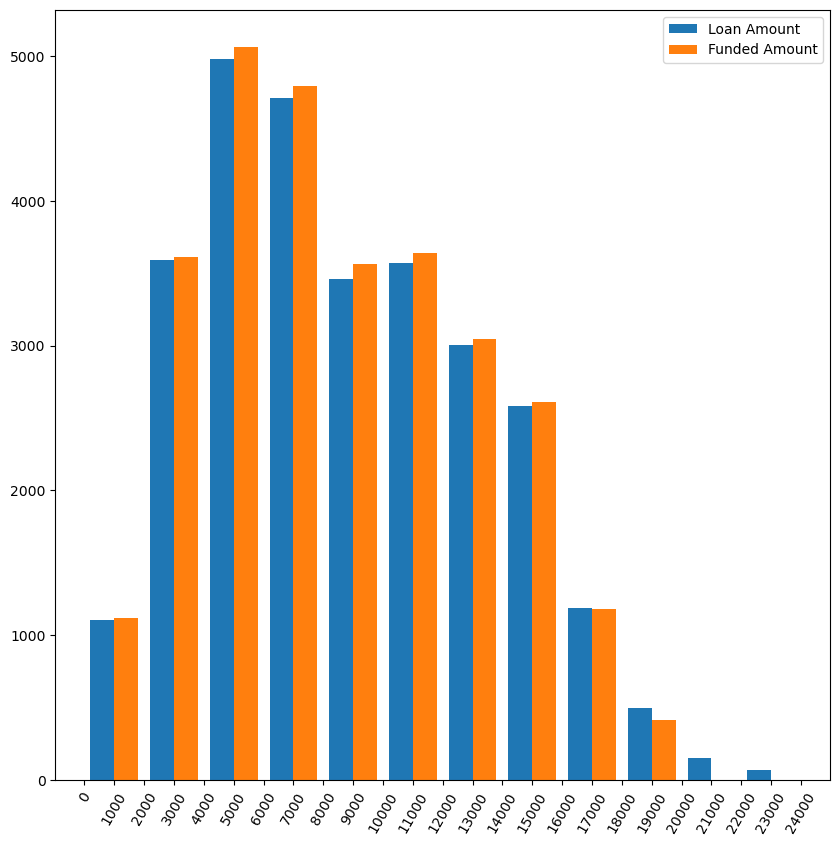

In [95]:
ax = plt.subplots(figsize=(10, 10))
plt.hist([loan.loan_amnt, loan.funded_amnt], label=['Loan Amount', 'Funded Amount'], bins=list( range(0, 26000, 2000) ) )
plt.legend()
plt.xticks(list( range(0, 25000, 1000) ), rotation=60)
plt.show()

Observations
- We have funded amount ranging from 500 to 18000 with an average lending amount of 8238.
- Approximately 50% of the borrowers fall below 7800 
- 75% of the borrowers have received amount below or equal 11875
- Maximum borrowers have received loan in the range of 4500 to 6500
- The maximum requested loan amount is upto 25000 and the maximum funded amount is upto 18000
- We have maximum borrowers with request for a loan amount in the range of 4000 to 5000 and maximum funded amount in the range of 5000 to 6000 

In [96]:
table = loanChargedOff[['income_slab', 'interest_grp']].pivot_table(index='income_slab', columns= ['interest_grp'],
                aggfunc=len)
table['Sum'] = table.sum(axis = 1)
table.style.format("{:.0f}")

interest_grp,10 - 12%,12 - 14%,14 - 20%,5 - 10%,Sum
income_slab,,,,,
0 - 50K,528,556,723,434,2241
100K - 150K,29,27,47,26,129
50K - 100K,330,312,542,247,1431


Observation from Pair plot
- Interest Rate increases with increase in loan amount and funded amount
- Installment increases with increase in loan amount and funded amount
- Funded amount shows increase with increase in annual income
- Irrespective of the annual income the maximum charge offs come from high interest group of 14-20% and are more than 30% in each of the annual income categories
- Lower rate of interes is recommended

In [97]:
def biVariateAnalysis(variable1, variable2='loan_status', xTickRotation = 0, yTickUpperLim = 0, yTickInterval = 0, 
                      xLabel = '', nRows = 1, nCols = 2, figSize=(10, 5)) :
    
    plt.figure(figsize=figSize)

    plt.subplot(nRows, nCols, 1)
    sns.countplot(loan, x=variable1, hue=variable2)
    plt.legend()
    plt.xticks(rotation=xTickRotation)
    
    if yTickUpperLim  > 0 :
        plt.yticks(list( range(0, yTickUpperLim, yTickInterval)))
        
    xLabel1 = '\n' + xLabel +  ' - Fully Paid/Charged Off'
    xLabel2 = '\n' + xLabel +  ' - Charged Off'
    plt.xlabel(xLabel1)

    plt.subplot(nRows, nCols, 2)
    sns.countplot(loanChargedOff, x=variable1, width=0.4)
    plt.xticks(rotation=xTickRotation)
    plt.xlabel(xLabel2)

    plt.show()

#### Impact of Verification Status on Loan Status

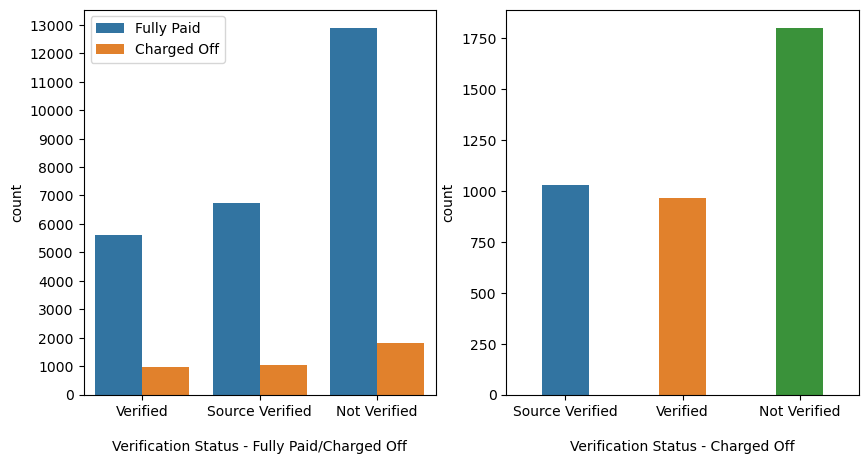

In [98]:
biVariateAnalysis(variable1='verification_status', yTickUpperLim = 14000, yTickInterval = 1000, 
                  xLabel='Verification Status')

In [99]:
loan[loan.verification_status == 'Not Verified'].shape[0] / loan.shape[0] * 100

50.60253408621402

Observation
- The maximum charge offs come from Not Verified category.
- This ould be because 50% of borrowers of Lending Club are Not Verified
- Recommend to verify the applicants before funding the loan

In [100]:
table2 = loanChargedOff.verification_status.value_counts() / loan.verification_status.value_counts()* 100
table2

verification_status
Not Verified       12.261006
Source Verified    13.263077
Verified           14.727383
Name: count, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Not Verified'),
  Text(1, 0, 'Source Verified'),
  Text(2, 0, 'Verified')])

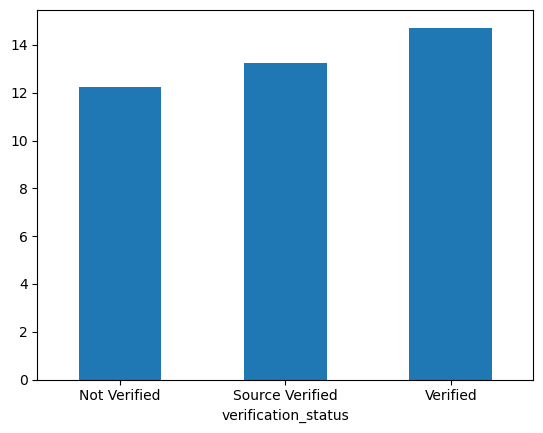

In [101]:
table2.plot.bar()
plt.xticks(rotation=0)

Observation
- On further drill down in each of the categories, we see that maximum of applications coming from Verified applicants are defaulted
- This is observed on calculating number of charged off applications in each category against the total number of applications in that category
- Recommend to improve the verification process of the applicants to be more effective

#### Impact of Loan Duration on Loan Status

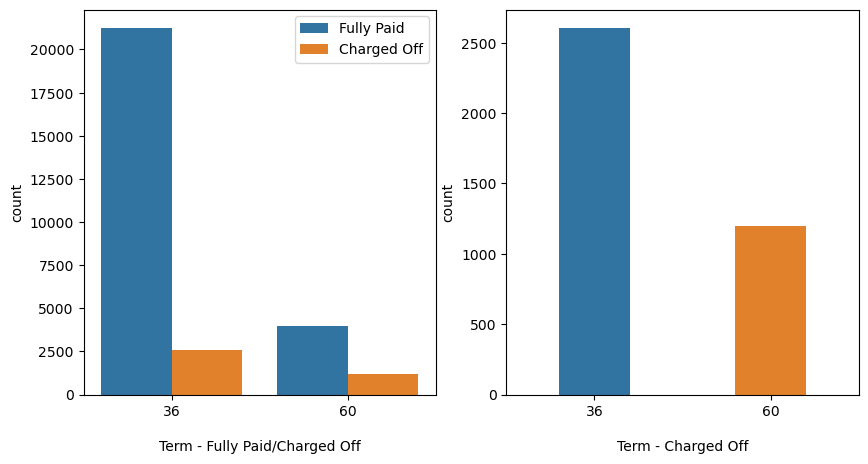

In [102]:
#Term versus loan status
biVariateAnalysis(variable1='term', xLabel='Term')

Observation
- We see more defaults(68.5%) in 36 months applications compared to 31.4% in 60 months applications
- Shorter term of 36 months is contribting to 68.5% of the total charge Offs

In [103]:
table2 = loanChargedOff.term.value_counts() / loan.term.value_counts() *100
table2

term
36    10.919685
60    23.053200
Name: count, dtype: float64

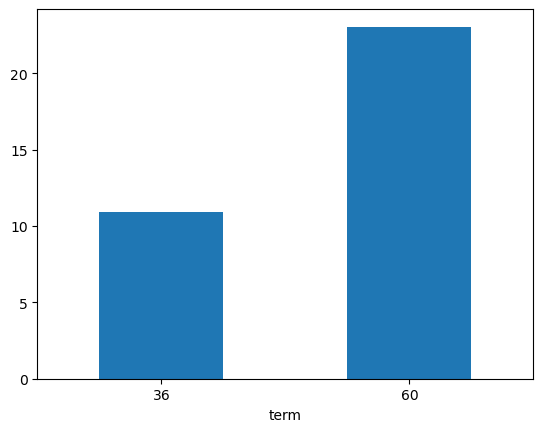

In [104]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

In [105]:
table = loanChargedOff[['fundedAmntRange', 'term']].pivot_table(index='fundedAmntRange', columns= ['term'],
                aggfunc=len)
table.style.format("{:.0f}")

term,36,60
fundedAmntRange,,
0 - 3K,343,52
12 - 15K,259,242
15 - 18K,202,230
18K +,32,42
3 - 6K,718,197
6 - 9K,624,224
9 - 12K,427,209


In [106]:
table1 = loan[['fundedAmntRange', 'term']].pivot_table(index='fundedAmntRange', columns= ['term'],
                aggfunc=len)
table1.style.format("{:.0f}")

term,36,60
fundedAmntRange,,
0 - 3K,2507,180
12 - 15K,2813,1168
15 - 18K,1924,928
18K +,272,141
3 - 6K,6309,805
6 - 9K,5923,1029
9 - 12K,4108,937


In [107]:
final = table / table1 * 100
final

term,36,60
fundedAmntRange,,
0 - 3K,13.681691,28.888889
12 - 15K,9.207252,20.719178
15 - 18K,10.498960,24.784483
18K +,11.764706,29.787234
3 - 6K,11.380567,24.472050
6 - 9K,10.535202,21.768707
9 - 12K,10.394352,22.305229


<Axes: xlabel='fundedAmntRange'>

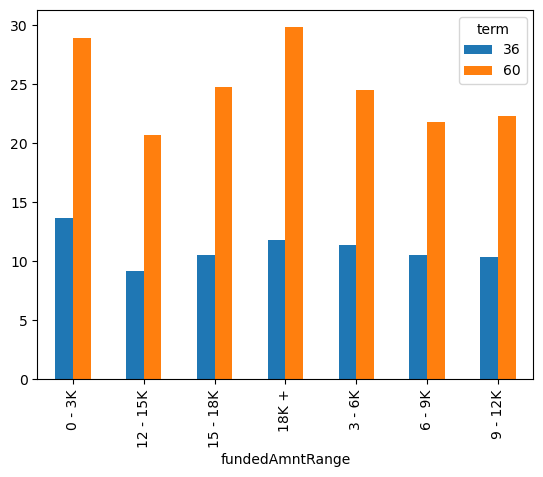

In [108]:
final.plot.bar()

Observation
- On further study for charge off in each of the terms against applications received in those term swe identify that:
    - Long term of 60 months is contributing more to default
    - The maximum defaults of 60 months come from high funded amounts namely 18K+, 15-18K, 12-15K
    - Recommend more caution and verification before funding higher funded amounts for 60 months

#### Impact of Income Slab on Loan Defaults

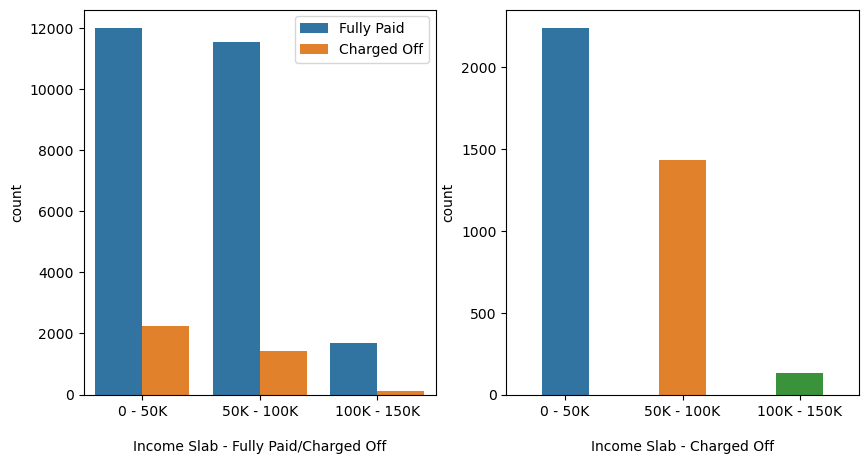

In [109]:
#Income slab versus loan status
biVariateAnalysis(variable1='income_slab', xLabel='Income Slab')

Observation
- It appears that more Defaults in Charged Off category come from income groups below 100K
- Defaults significantly decrease with income group of 100K and above
- Recommend to revisit the loan eligibility and amount with resspect to annual income 

In [110]:
table2 = loanChargedOff.income_slab.value_counts() / loan.income_slab.value_counts()* 100
table2

income_slab
0 - 50K        15.729627
50K - 100K     11.031452
100K - 150K     7.068493
Name: count, dtype: float64

In [111]:
table1 = loan[['fundedAmntRange', 'income_slab']].pivot_table(index='income_slab', columns= ['fundedAmntRange'],
                aggfunc=len)
table1.style.format("{:.0f}")

fundedAmntRange,0 - 3K,12 - 15K,15 - 18K,18K +,3 - 6K,6 - 9K,9 - 12K
income_slab,,,,,,,
0 - 50K,1858,1433,810,88,4272,3555,2231
100K - 150K,62,353,304,54,300,389,363
50K - 100K,767,2195,1738,271,2542,3008,2451


In [112]:
table2 = loanChargedOff[['fundedAmntRange', 'income_slab']].pivot_table(index='income_slab', columns= ['fundedAmntRange'],
                aggfunc=len)
table2.style.format("{:.0f}")

fundedAmntRange,0 - 3K,12 - 15K,15 - 18K,18K +,3 - 6K,6 - 9K,9 - 12K
income_slab,,,,,,,
0 - 50K,312,250,157,23,624,529,346
100K - 150K,5,25,26,5,15,29,24
50K - 100K,78,226,249,46,276,290,266


In [113]:
final = table2 / table1 * 100
final

fundedAmntRange,0 - 3K,12 - 15K,15 - 18K,18K +,3 - 6K,6 - 9K,9 - 12K
income_slab,,,,,,,
0 - 50K,16.792250,17.445918,19.382716,26.136364,14.606742,14.880450,15.508740
100K - 150K,8.064516,7.082153,8.552632,9.259259,5.000000,7.455013,6.611570
50K - 100K,10.169492,10.296128,14.326812,16.974170,10.857592,9.640957,10.852713


Observation
- Further analysis complements the earlier findings
- Defaults are 19% and 26% in income group below 50K for loan amounts above 15K
- The defaults 14% and 16.9% for income range 50-100K for funded amounnt 15K and above
- Recommend to carefully consider the income slab and funded amounts for applicants to reduce defaults

#### Impact of interest group on Loan Defaults

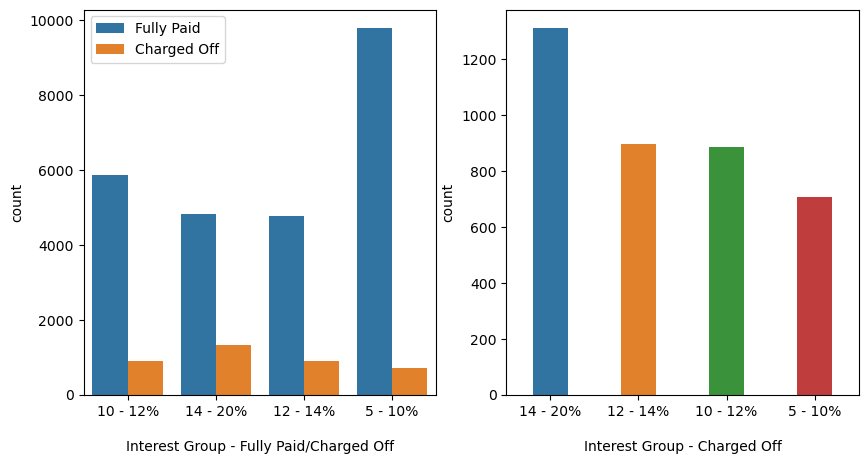

In [114]:
#Interest group versus loan status
biVariateAnalysis(variable1='interest_grp', xLabel='Interest Group')

In [115]:
table2 = loanChargedOff.interest_grp.value_counts() / loan.interest_grp.value_counts()* 100
table2

interest_grp
10 - 12%    13.138794
12 - 14%    15.787617
14 - 20%    21.402936
5 - 10%      6.737183
Name: count, dtype: float64

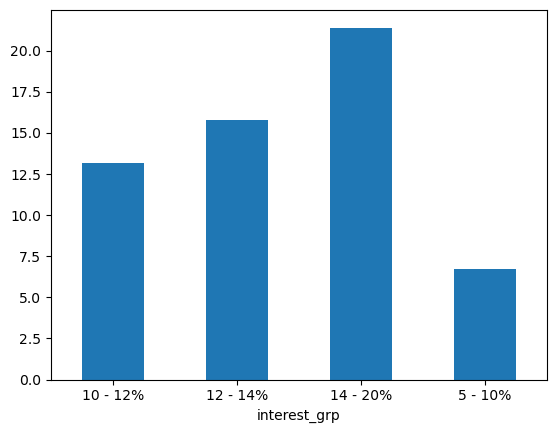

In [116]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation
- We see the maximum defaults in high interest loans
- The interst rate is directly proportional with loan defaults
- Recommend lower interest rates with thorogh evaluation of other factors like annual income etc. before choosing higher interest rates

#### Impact of Home Ownership on Loan Defaults

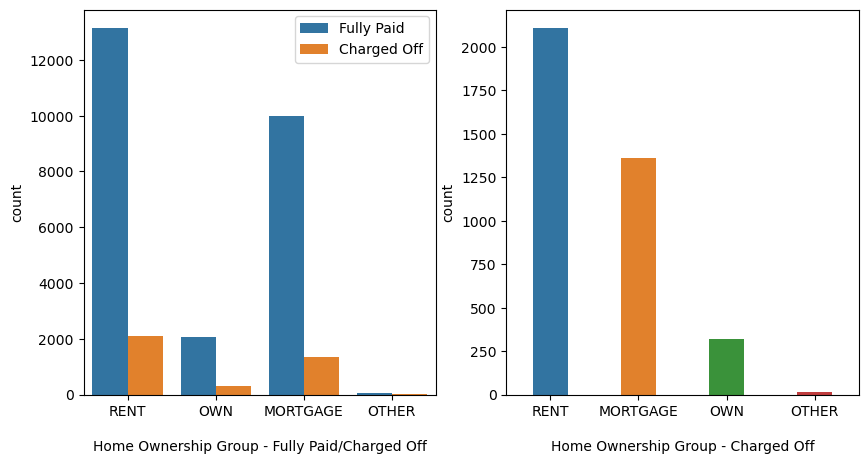

In [117]:
#Home Ownership versus loan status
biVariateAnalysis(variable1='home_ownership', xLabel='Home Ownership Group')

In [118]:
table2 = loanChargedOff.home_ownership.value_counts() 
table1 = loan.home_ownership.value_counts()
table2 / table1 * 100

home_ownership
RENT        13.819326
MORTGAGE    12.021183
OWN         13.347368
OTHER       16.470588
Name: count, dtype: float64

Observation
- On further examination we observe that charge off is more ikely in applications coming from 'Other' ownership 
- For the remaining home ownerships charge off is almost equally likely
- No recommendations can be made based on home ownership

#### Impact of Employment Length on Loan Defaults

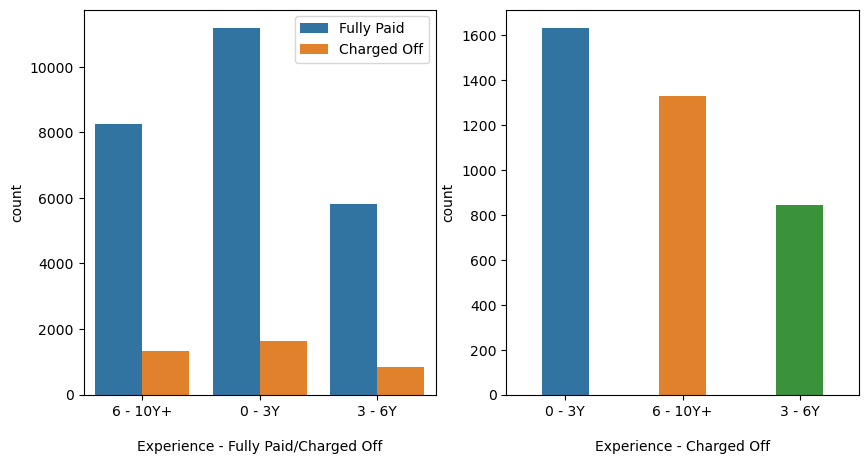

In [119]:
#Exp group versus loan status
biVariateAnalysis(variable1='exp_group', xLabel='Experience')

Observation
- We see maximum defaults in low employment length (0-3Y) based on the plot
- There are also considerable defaults in higher employment lengths (6+ years) based on the plot
- The defaults is lowest in 3-6 years based on the plot
- However, based on percentage of appliants versus percentage of applicants charged off in a particular group, there is maximum defaults in the '3 - 6Y' employment length
- Recommend a thorough review of employment length against the funded amount and other factors

In [120]:
table2 = loanChargedOff.exp_group.value_counts() / loan.exp_group.value_counts()* 100
table2

exp_group
0 - 3Y      12.715500
6 - 10Y+    13.869147
3 - 6Y      12.678384
Name: count, dtype: float64

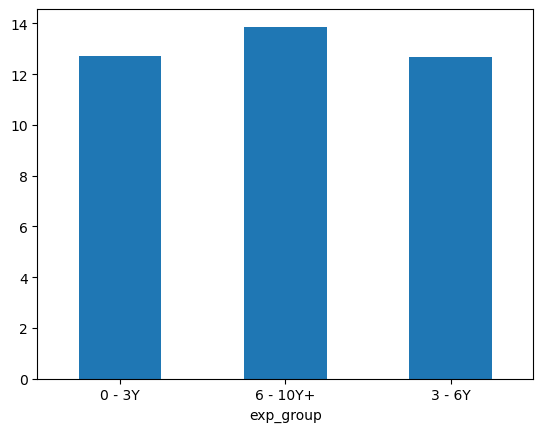

In [121]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

In [122]:
table1 = loanChargedOff[['fundedAmntRange', 'exp_group']].pivot_table(index='fundedAmntRange', columns= ['exp_group'],
                aggfunc=len)
table1.style.format("{:.0f}")

table2 = loan[['fundedAmntRange', 'exp_group']].pivot_table(index='fundedAmntRange', columns= ['exp_group'],
                aggfunc=len)
table2.style.format("{:.0f}")

final = table1 / table2
final

exp_group,0 - 3Y,3 - 6Y,6 - 10Y+
fundedAmntRange,,,
0 - 3K,0.153195,0.117021,0.157767
12 - 15K,0.117978,0.127572,0.133618
15 - 18K,0.143810,0.142195,0.163636
18K +,0.181159,0.148936,0.193370
3 - 6K,0.127368,0.130490,0.129261
6 - 9K,0.121319,0.124220,0.121294
9 - 12K,0.114943,0.119304,0.145520


Observation
- Further study, based on percentage of appliants versus percentage of applicants charged off in a particular group, there are maximum defaults in the '6 - 10Y+' employment length
- These come primarily from the high loan amounts that these people borrow
- Recommend a thorough review of employment length against the funded amount and other factors

#### Impact of Issue Month on Loan Defaults

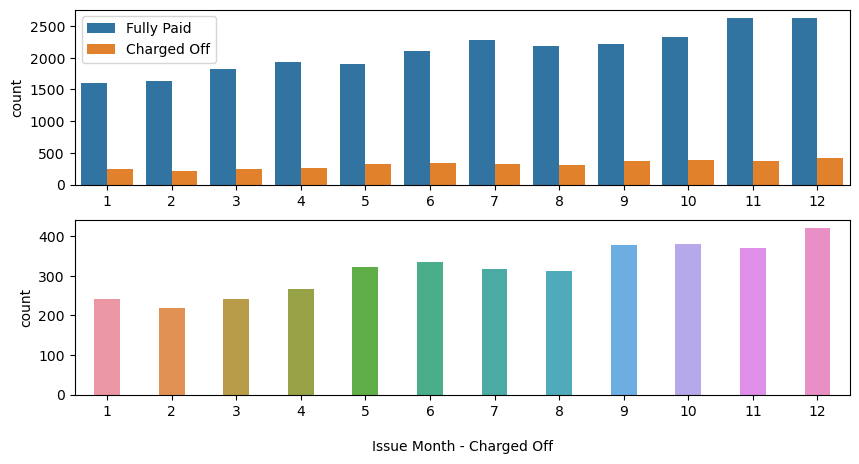

In [123]:
#Issue month versus loan status
biVariateAnalysis(variable1='issue_month', xLabel='Issue Month', nRows=2, nCols=1)

Observation
- We see more defaults in the second half of the year compared to first half
- There is increasing trend of defaults from Feb to June post which we see a fall followed by a rise at the end of the year
- No recommendation can be made based on the Issue Month

#### Impact of Issue Year on Loan Defaults

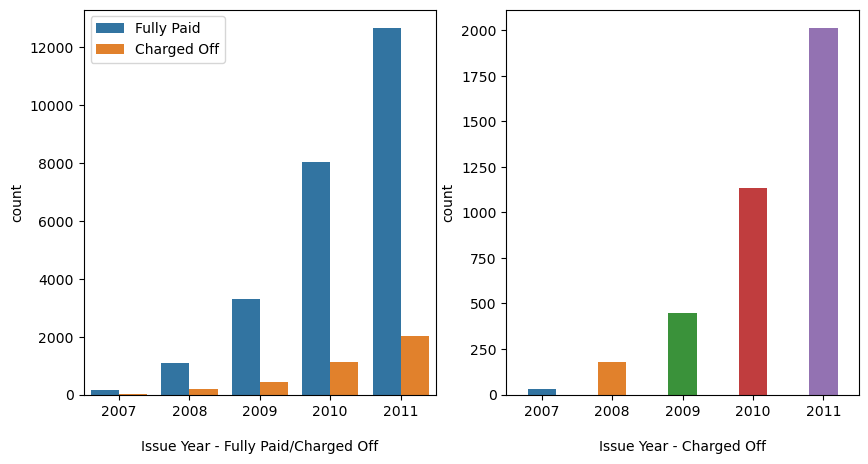

In [124]:
#Issue year versus loan status
biVariateAnalysis(variable1='issue_year', xLabel='Issue Year')

Observations
- There is non linear increae in loan defaults year on year
- This could be linked to increase in loans issued in 2011

In [125]:
table2 = loanChargedOff.issue_year.value_counts() / loan.issue_year.value_counts()* 100
table2.sort_values(ascending=False)

issue_year
2007    15.957447
2008    13.960784
2011    13.723085
2010    12.337875
2009    11.983914
Name: count, dtype: float64

In [126]:
table2.mean()

13.592621060020111

Observation
- The direct percentage statistcs show maximum charge off in 2007 and 2008. These could be linked to the global recession in the year 2008.
- There as 2% reduction in charge offs in 2009 and increase by 1% year on year in 2010 and 2011
- Average charge offs for lending club from year 2007 to 2011 was 13.59% ~ 13.6%

#### Impact of Inquiries on Loan Defaults

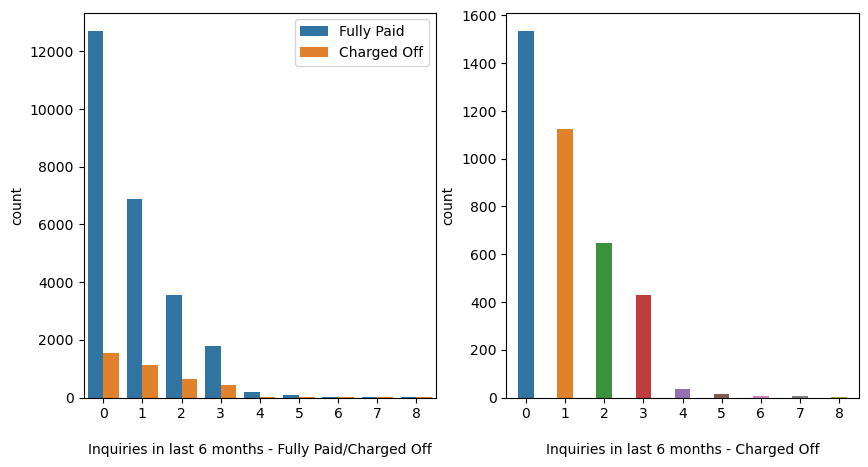

In [127]:
#Inquiries in last 6 months versus loan status
biVariateAnalysis(variable1='inq_last_6mths', xLabel='Inquiries in last 6 months')

Observation
- It appears that the maximum number of charged off applicants have 0 inquiries
- The trend seen in the graph with maximum charge offs decreasing from 0 to 7 is due to the minimum number of applicants in those categories
- Recommed to consider applicants with 0 inquiries in general

In [128]:
table2 = loanChargedOff.inq_last_6mths.value_counts() / loan.inq_last_6mths.value_counts()* 100
table2.sort_values(ascending=False)

inq_last_6mths
7    26.086957
6    23.529412
3    19.343230
4    16.037736
2    15.432246
8    14.285714
5    14.141414
1    14.057229
0    10.776467
Name: count, dtype: float64

Observation
- Further study reveals that charge off rate increases with increase in number of inquries in the last 6 months
- Recommed to prefer applicants with 0 inquiries in general

#### Impact of Bankruptcies on Loan Defaults

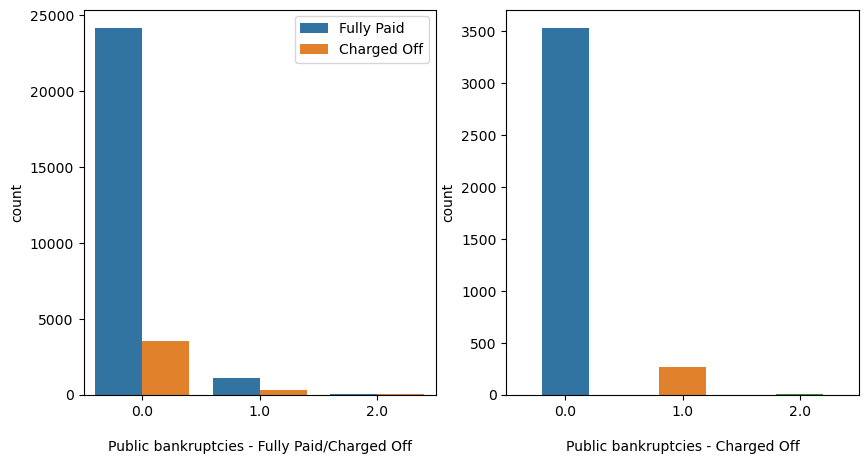

In [129]:
#Public bankruptcies versus loan status
biVariateAnalysis(variable1='pub_rec_bankruptcies', xLabel='Public bankruptcies')

Observation
- Studying the number of charge ffs that come from each category of bankruptcy aganst the total charge offs reveals that maximum defaults come from applicants having 0 bankruptcies
- The trend seen in the graph with maximum pub_rec_bankruptcies decreasing from 0 to 2 can be linked to the decreasing number of applicants in those categories
- Recommed NOT TO consider applicants with 1 or 2 public record bankruptcies

In [130]:
table2 = loanChargedOff.pub_rec_bankruptcies.value_counts() / loan.pub_rec_bankruptcies.value_counts()* 100
table2.sort_values(ascending=False)

pub_rec_bankruptcies
2.0    50.000000
1.0    19.822485
0.0    12.752817
Name: count, dtype: float64

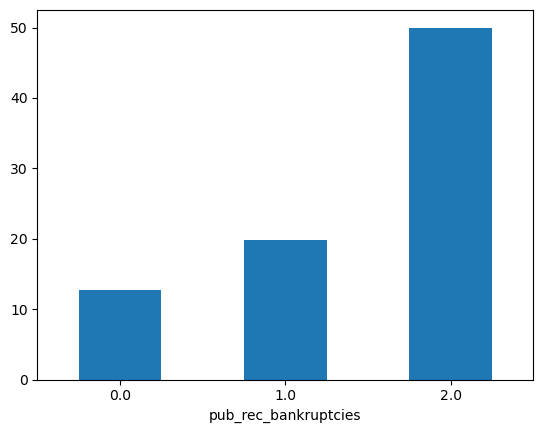

In [131]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation
- Further study reveals that increase in number of bankruptcy records increases charge offs significantly
- Recommed NOT TO consider applicants with public record bankruptcies

#### Impact of Open Accounts on Loan Defaults

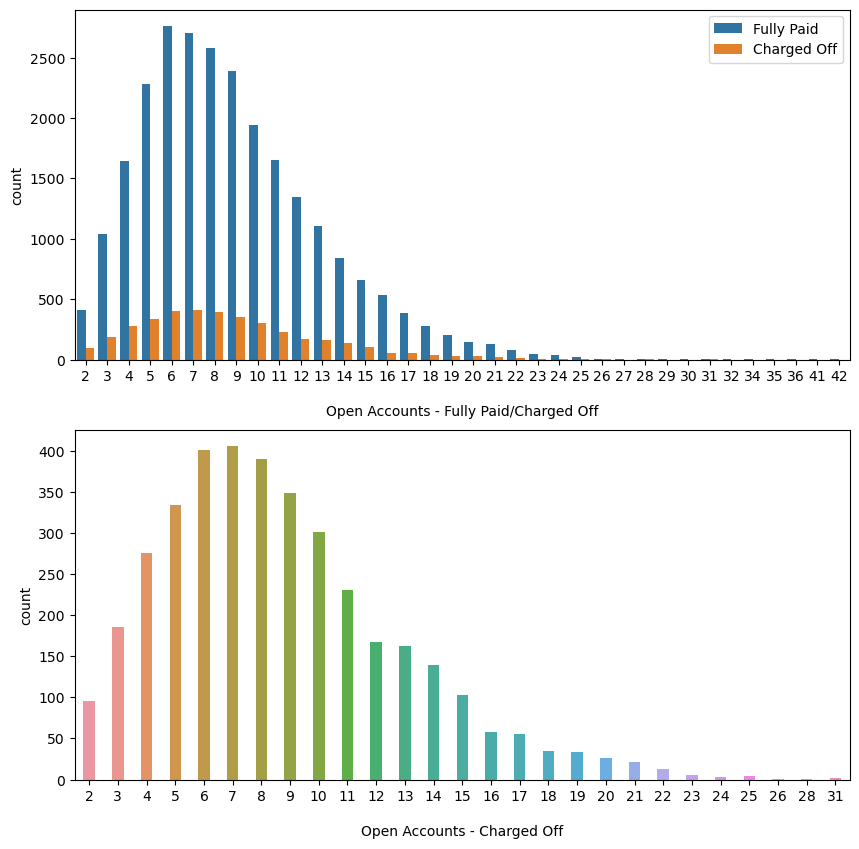

In [132]:
#Open accounts versus loan status
biVariateAnalysis(variable1='open_acc', xLabel='Open Accounts', nRows=2, nCols=1, figSize=(10, 10))

In [133]:
table2 = loanChargedOff.open_acc.value_counts() / loan.open_acc.value_counts() * 100

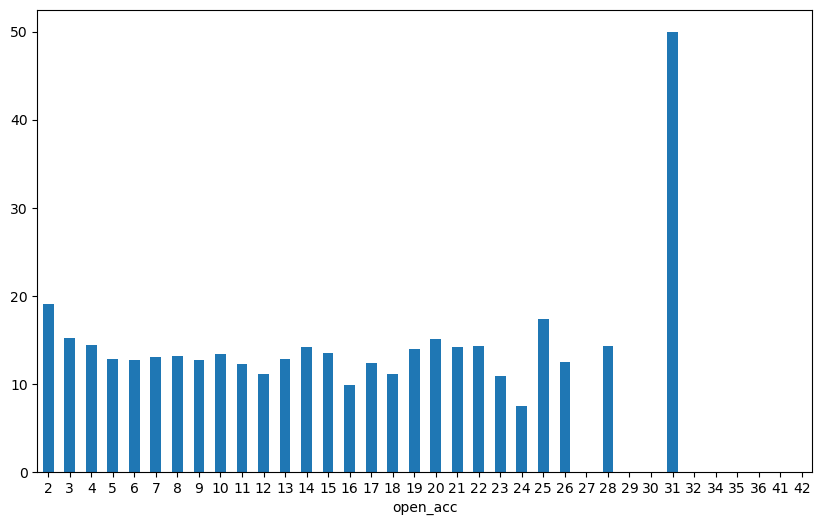

In [134]:
plt.figure(figsize=(10, 6))
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation
- Recommend a thorough review of applicants having multiple open accounts
- Even applicants with 2 open accounts show a charge off rate of 19%

#### Impact of Total Accounts on Loan Defaults

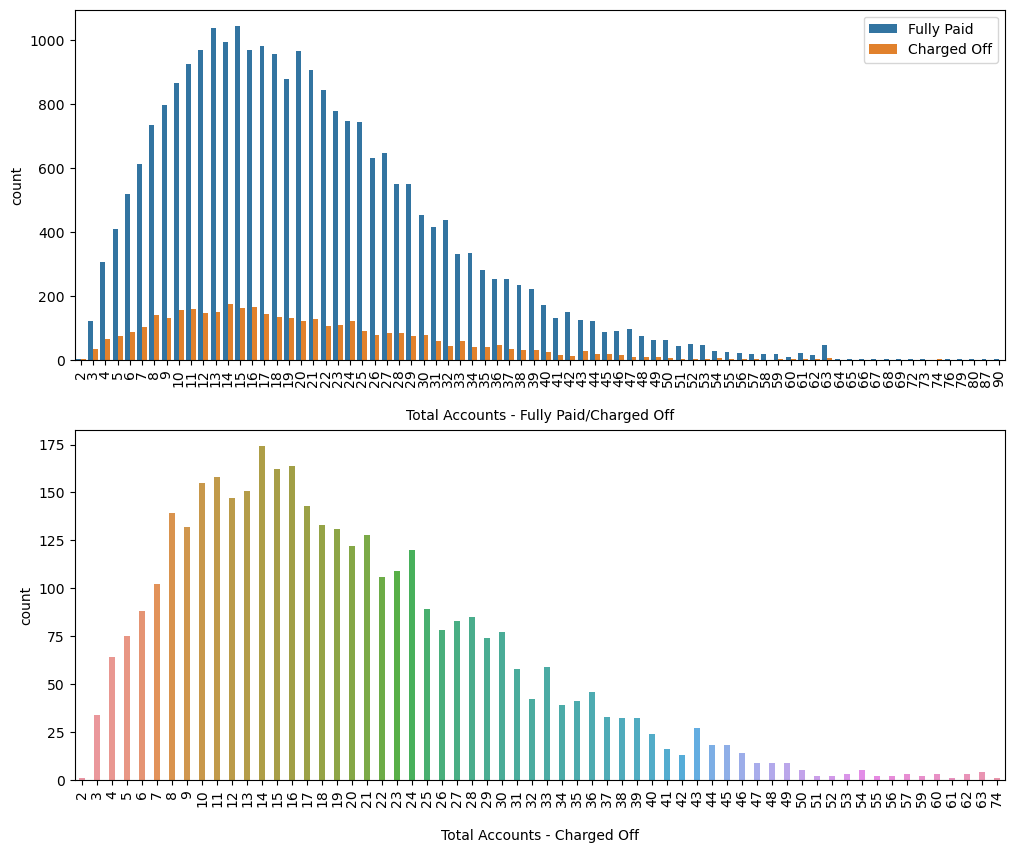

In [135]:
#Total accounts versus loan status
biVariateAnalysis(variable1='total_acc', xLabel='Total Accounts', nRows=2, nCols=1, figSize=(12, 10), xTickRotation = 90)

Observation
- Recommend a thorough review of applicants having multiple accounts

#### Impact of State on Loan Defaults

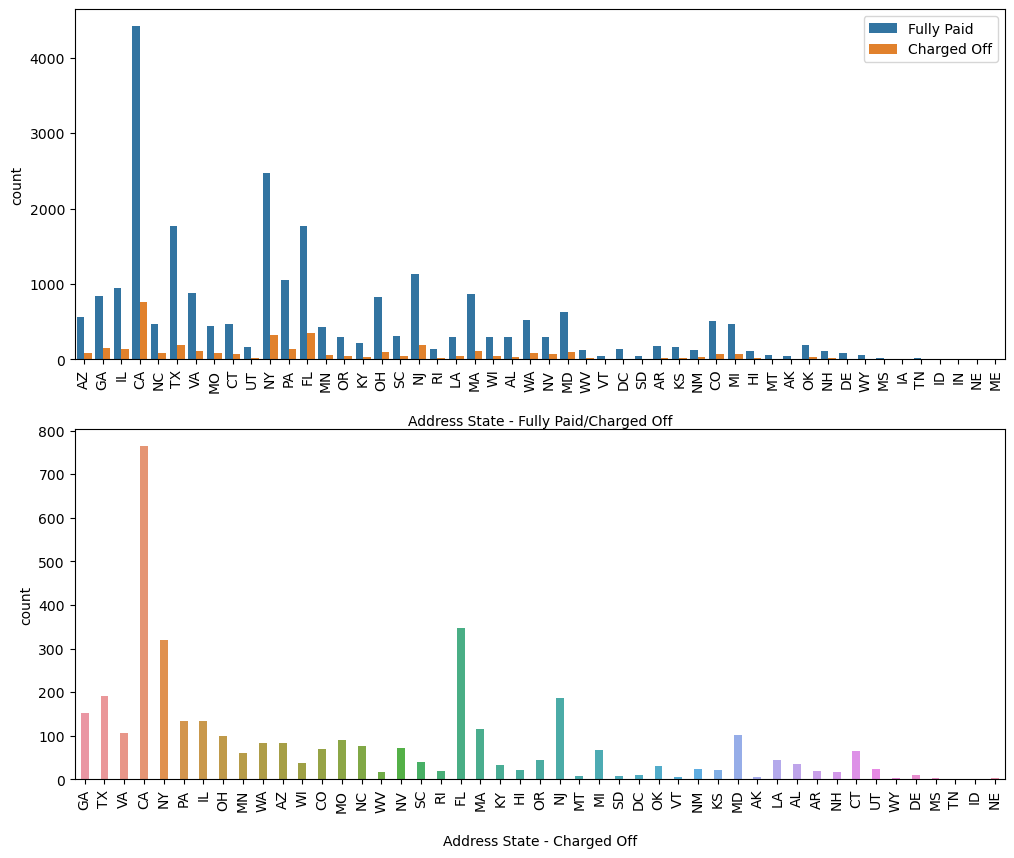

In [136]:
#Address state versus loan sttus
biVariateAnalysis(variable1='addr_state', xLabel='Address State', nRows=2, nCols=1, figSize=(12, 10), xTickRotation = 90)

Observation
- The composition of applicants charged off is maximum for California followed by Florida
- Recomment a thorough review of applicants from California and Florida

<Axes: xlabel='addr_state'>

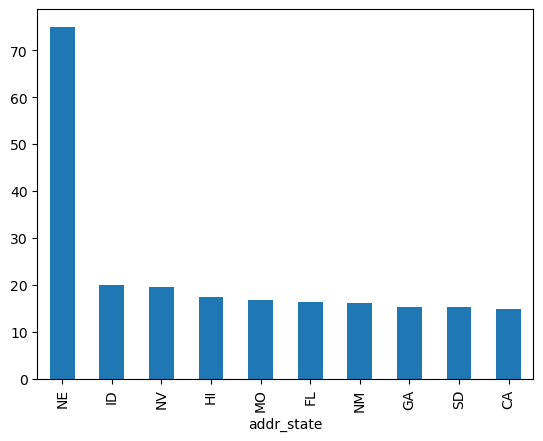

In [137]:
final = loanChargedOff.addr_state.value_counts() / loan.addr_state.value_counts()* 100
final.sort_values(ascending=False).head(10).plot.bar()

Observation
- Further study of charge off in each of the state against the number of applicants from that state shows that:
    - Applicants from Nebraska, Nevada and Idaho are more likely to charge off
    - Recommend more scrutiny for aplicants coming from NE, ID, NV, HI, MO, FL, NM, GA, SD and CA

#### Impact of Public records on Loan Defaults

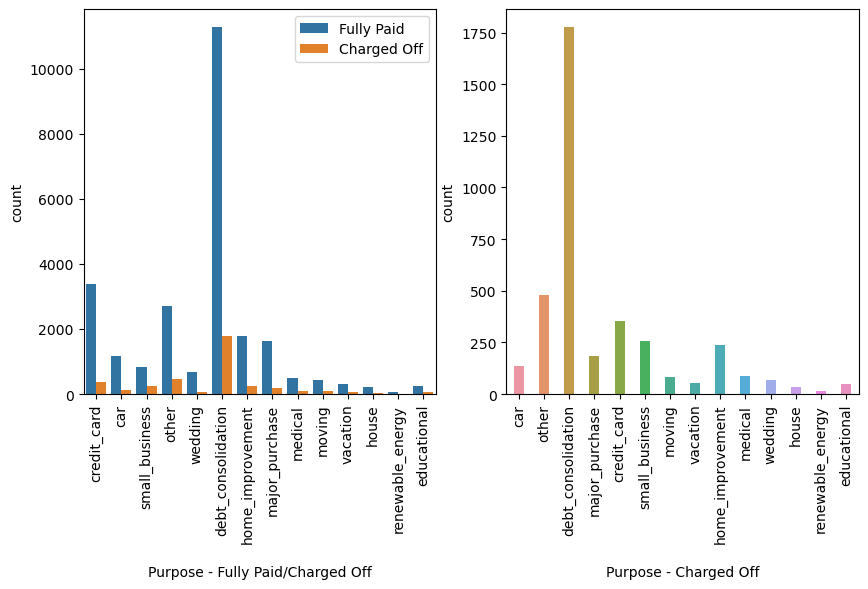

In [138]:
#Purpose versus loan status
biVariateAnalysis(variable1='purpose', xLabel='Purpose', xTickRotation = 90)

Observation
- The composition of applicants charged off is maximum for debt consolidation followed by other category

In [139]:
table2 = loanChargedOff.purpose.value_counts() / loan.purpose.value_counts() * 100
table2.sort_values(ascending=False)


purpose
small_business        23.703704
renewable_energy      19.512195
educational           16.783217
moving                15.841584
medical               15.248227
other                 14.929577
vacation              14.825581
debt_consolidation    13.597365
house                 12.451362
home_improvement      11.637081
car                   10.252487
major_purchase        10.169492
credit_card            9.456580
wedding                9.090909
Name: count, dtype: float64

In [140]:
table1 = loanChargedOff[['income_slab', 'purpose']].pivot_table(index='income_slab', columns= ['purpose'],
                aggfunc=len)
table1.style.format("{:.0f}")

table2 = loan[['income_slab', 'purpose']].pivot_table(index='income_slab', columns= ['purpose'],
                aggfunc=len)
table2.style.format("{:.0f}")

final = round( table1 / table2 * 100, 1)

<Axes: xlabel='purpose', ylabel='income_slab'>

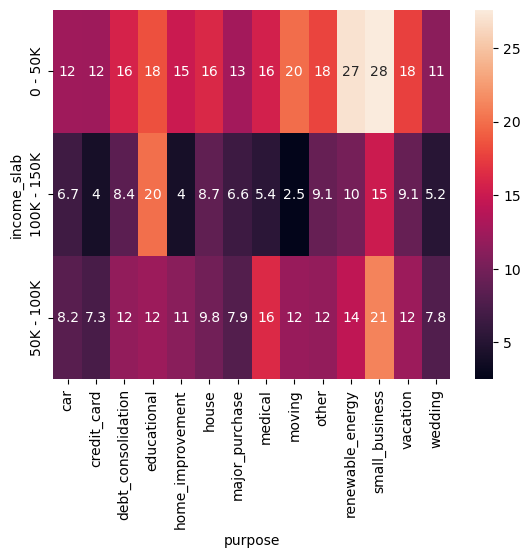

In [141]:
sns.heatmap(final, annot=True)

Observation
- In general, Small businesses, education and renewable energy are the top 3 defaults
- Small businesse most likely default in income slabs below 50K and higher than 100K
- For income range 50-100K, education is the top contributor followed by small businesses.
- Recomment a thorough review while funding Small businesses specially in lower income groups

#### Impact of Public records on Loan Defaults

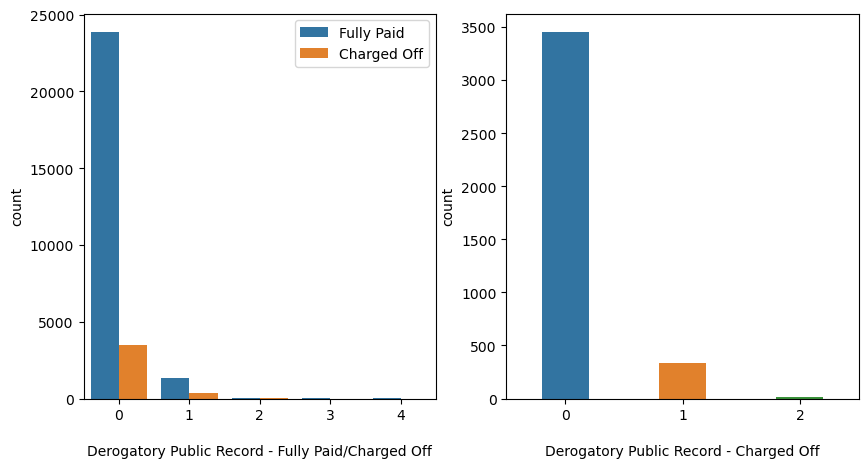

In [142]:
#Public record versus loan staus
biVariateAnalysis(variable1='pub_rec', xLabel='Derogatory Public Record')

In [143]:
table2 = loanChargedOff.pub_rec.value_counts() / loan.pub_rec.value_counts() * 100
table2

pub_rec
0    12.637664
1    20.240240
2    24.390244
3          NaN
4          NaN
Name: count, dtype: float64

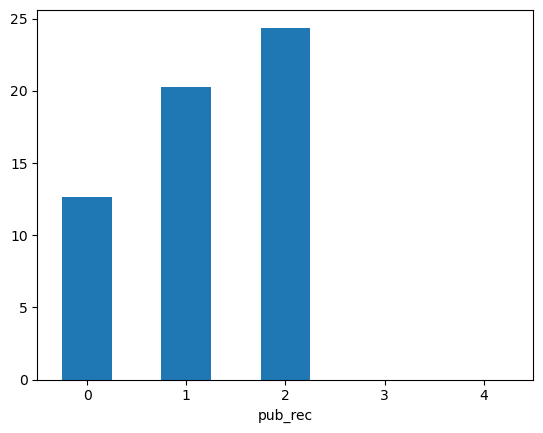

In [144]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation
- A major composition of chargoffs when studied with public records comes from 0 records
- This relates to the fact that most applicants do not have public records
- Public records is an indicator of more likelihood of defaults
- Applicants with public records may not be considered for loans

#### Impact of Grades records on Loan Defaults

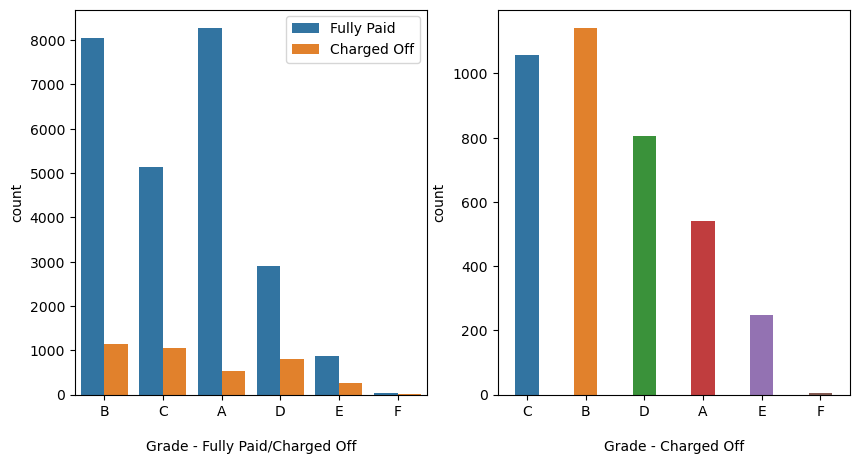

In [145]:
#Grade versus loan status
biVariateAnalysis(variable1='grade', xLabel='Grade')

In [146]:
table2 = loanChargedOff.grade.value_counts() / loan.grade.value_counts() * 100

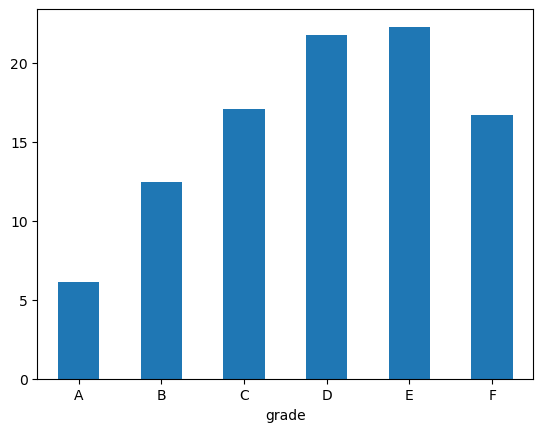

In [147]:
table2.plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation
- A major composition of chargoffs when studied with grades comes from Grade B
- Grade A has minimum defaults of 6%
- Grades C-F have a high charge off rate
- Recommend to consider applicants from Grade A and B

#### Impact of Income Group on loan status

C:\Users\trita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

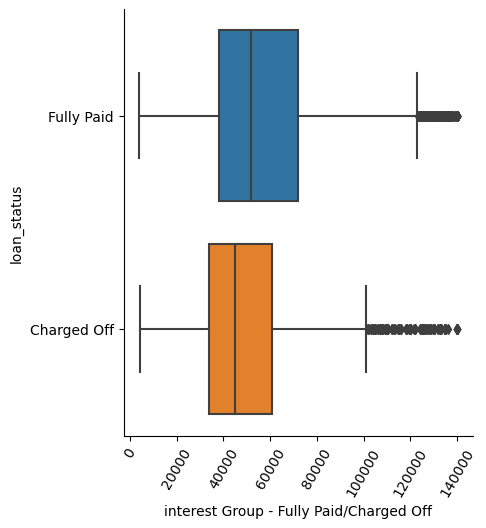

In [148]:
# box plot of Income Group versus loan status

plt.figure(figsize=(10, 5))

sns.catplot(loan, x='annual_inc', y='loan_status', kind='box')
plt.xticks(rotation=60)
plt.xlabel("interest Group - Fully Paid/Charged Off")

plt.show()

Observation
- Lower income groups are more likely to charge-off

#### Impact of interest rate on loan status

C:\Users\trita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

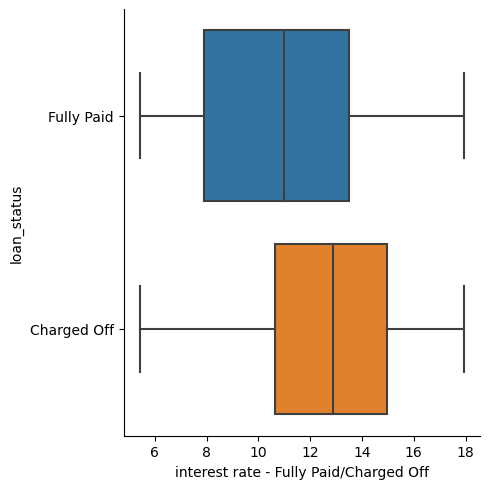

In [149]:
# box plot of interest rate versus loan status

plt.figure(figsize=(10, 5))

sns.catplot(loan, x='int_rate', y='loan_status', kind='box')
plt.xlabel("interest rate - Fully Paid/Charged Off")

plt.show()

Observation
- High interest rates are more likely to charge-off

#### Imapact of Interest rate increases on Funded amount

<Axes: xlabel='int_rate', ylabel='funded_amnt'>

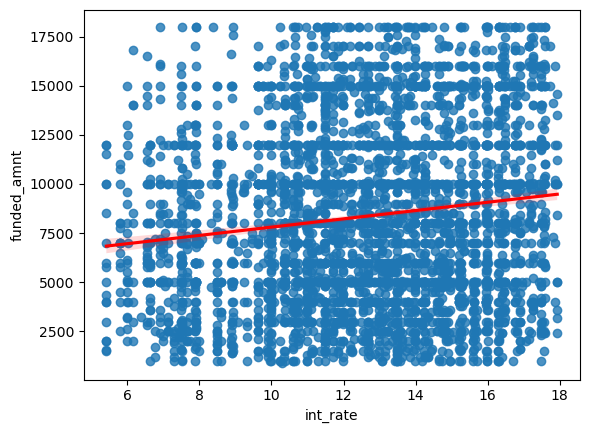

In [150]:
#Annual income versus interest rate - Charged off/Fully paid

sns.regplot(data= loanChargedOff, x='int_rate', y='funded_amnt', line_kws=dict(color="r"))

Observation
- Interest rate increases with Funded amount

#### Imapct of Annual Income on funded amount

<Axes: xlabel='annual_inc', ylabel='funded_amnt'>

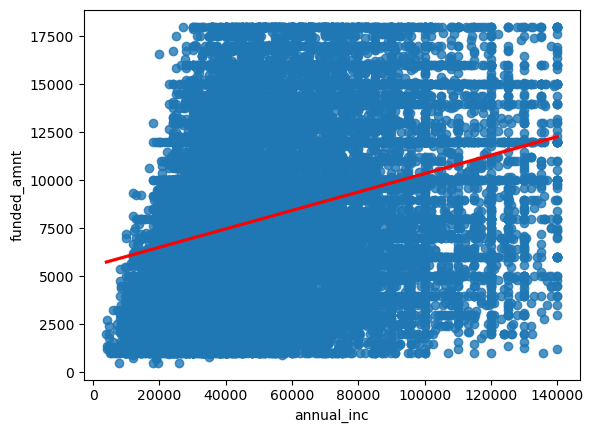

In [151]:
#Annual income versus Funded amount - Charged off/Fully paid

sns.regplot(data= loan, x='annual_inc', y='funded_amnt', line_kws=dict(color="r"))

Observation
- Higher Annual income is more likely to get larger funds